<a href="https://colab.research.google.com/github/mingyuema1217/TowerDefenseGame/blob/master/Multilayer_Neural_Network_(Numpy_Only).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Using Numpy Only to Implement Multilayer Neural Network**
Accomplish a multi-class classification task on the provided dataset

# 0. Import Requierd Libraries

In [ ]:
import numpy as np

In [ ]:
# For reading the data
import re
import time
import matplotlib.pyplot as plt
import seaborn as sns
import inspect
import pickle
import time
from sklearn.metrics import classification_report, confusion_matrix
import os
import zipfile

# 1. Load Data

In [ ]:
!wget --header='Host: drive.usercontent.google.com' --header='User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36' --header='Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7' --header='Accept-Language: en-US,en;q=0.9,vi;q=0.8' --header='Cookie: SID=g.a000hAiDNMGLmlmI8WP2uNc4fkAw9NIT3CBgwOoVfDTLBxXx0VmrU6XWLNUpFLHu3JIEc4BhMwACgYKAVISAQASFQHGX2Mi2hSQ1ylGC0zPDlmcJBzUxxoVAUF8yKqjWqqmbvMg-hENYxu3t_f40076; __Secure-1PSID=g.a000hAiDNMGLmlmI8WP2uNc4fkAw9NIT3CBgwOoVfDTLBxXx0VmrqQa_qA1cQjo6BW-BYvpQwQACgYKAWQSAQASFQHGX2MixrLgKSSMs3o4Q59YBTUDMRoVAUF8yKruVNxSm4tykyFUM08OjtXQ0076; __Secure-3PSID=g.a000hAiDNMGLmlmI8WP2uNc4fkAw9NIT3CBgwOoVfDTLBxXx0Vmr85URed2zxoX9Y2j0N7eEWgACgYKAcYSAQASFQHGX2MiVw8t_A_Cgz1A2WNIJ4xmUxoVAUF8yKosoPrNVWjaKHJpTY72CPi30076; HSID=ACzx1pw3ShKANVjOn; SSID=APFHJjkBX2Ardga4C; APISID=dxNw8ece1kCo5fAO/AXxCaUXF-K7mjXEus; SAPISID=CnQJa7gSq9zp2_u0/A9PUllhZ4wSjix75d; __Secure-1PAPISID=CnQJa7gSq9zp2_u0/A9PUllhZ4wSjix75d; __Secure-3PAPISID=CnQJa7gSq9zp2_u0/A9PUllhZ4wSjix75d; AEC=Ae3NU9P31jMLEqdaxTyRIYabDTkaH3z-0TFndxK6jNbqvrG5onjGEKpAAg; NID=512=RCQW39mQpEN5eL7qADv5XDGHRBIfDjig6TwJD0w-A8gQ8YdqQJEZ-sXc2D7-0LOcwUZYnn3nLYEr104Gh37rgn1R6_Z_qfBE-HRRgG94j4TXvi48nydZibrQaejXzu-y-kuN16zUsEzs25XwV7QgWSRYvYs20Sn45IQI78iRwzWFtWO0nyCTUyISif82pAimT8ChvS58bVNMwGdL7bRawtrdbfDjcXXsihMSdGje70rQsVNqSNFkY4f9BvGUay90YTQ72aHE-DYdiiMbWGwpvzSIxueS4uWJz-yxS_x-IK2R7xq13ChfuEqik-xvSK6CQQU0bKt3oY1HZYkcEdpJ5gSJLPuXgG0tY04YMph3kYlXzzJSUxeaBMsOyU7YPHL-XjfzpkNYR297-ipjYbNDB10C6GH1w8L5Xbp2qOn6FSLySP5WUxJp1B0xaIpm3cbpLS9Ok8Me7wYeYxoRH_mA145eX-YTE1PipMY78gMAgiKDjYqo3osQ2XjF5wUPgxbs66oO3VFzwUJaqM-m8NUWu1OirP_9ufD--S7x_5nt5oauYlWiBFM0ZBS6zqPy-go7DXfMq_2A52b2PsC2xweayFP7FSXd6qZskGzf6SRkKmzCwnLVQt7QHuYgnO9s42HZYV_Na3j579mmxXcd9RXzha-ONjnyl87MdmbvC48iNHXFjuTBidu4ak-Be7ktV7hzaNc5EkRevbuEBE4sZLbCaXnq25qciTumEDR-PkJ6BkcWmSHhmt1ncpxzflDcBqnPn9-AKAKkr3-6pXF6qlqzwWUHOJnH3NBF7UonA27oz-x6p83ZgAI_HBQut8ObTikULyEN7AZl7AGysZdetlzVRGWJMxeE5sLasKc2b-YMiEu5lLrgHzCrnePW9T15JrhXHxtnApgxuqngR0jzTdPnYAwUzosBukdxKd2MM87ixRgUhx3hwAL-X2hY-8mcaLywiduBgobC7DnPuuYJp5I; 1P_JAR=2024-03-12-23; __Secure-1PSIDTS=sidts-CjIBYfD7Z-RV7pAeo2n3jdeML5aQ-RWhxljnj4V2m60vIvD8TpxpccqdF_7po3xAznp2IhAA; __Secure-3PSIDTS=sidts-CjIBYfD7Z-RV7pAeo2n3jdeML5aQ-RWhxljnj4V2m60vIvD8TpxpccqdF_7po3xAznp2IhAA; SIDCC=AKEyXzWgMDAURtbhYZZaukOmlkB0yP-68WeDLD0w9sP-YXDQSisq6R4VGwiObhKlCUyZYQrhr2_h; __Secure-1PSIDCC=AKEyXzXMSMZTuNARscTVdkkSv8kvEcLts8crm5ZvDXCcZb4bcNdLCmv7ptgFbKJT6ZMAPcrVYhc; __Secure-3PSIDCC=AKEyXzXOPe8GuBWvIMs9VJQK7vEMpnOHw1xc7HBylZEKqDUOPQPFi4i8Lgd4i5eylN2Kp0rgmGU8' --header='Connection: keep-alive' 'https://drive.usercontent.google.com/download?id=1--R9BajB93t5bNaK4VMEBcVQQJGPqSYv&export=download&authuser=0&confirm=t&uuid=7d82a59a-e8bc-4f4a-9498-9d86a6e63924&at=APZUnTULQyXo28wH5AmkTCXafwHk%3A1710286096144' -c -O 'Assignment1-Dataset.zip'

--2024-04-12 12:15:20--  https://drive.usercontent.google.com/download?id=1--R9BajB93t5bNaK4VMEBcVQQJGPqSYv&export=download&authuser=0&confirm=t&uuid=7d82a59a-e8bc-4f4a-9498-9d86a6e63924&at=APZUnTULQyXo28wH5AmkTCXafwHk%3A1710286096144
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.122.132, 2607:f8b0:4004:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.122.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59066104 (56M) [application/octet-stream]
Saving to: ‘Assignment1-Dataset.zip’

Assignment1-Dataset 100%[===================>]  56.33M   103MB/s    in 0.5s    

2024-04-12 12:15:20 (103 MB/s) - ‘Assignment1-Dataset.zip’ saved [59066104/59066104]



In [ ]:
zip_path = '/content/Assignment1-Dataset.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_files = zip_ref.namelist()
  print("Files in zip: ", zip_files)
  extract_path = '/content/'
  os.makedirs(extract_path, exist_ok=True)
  zip_ref.extractall(extract_path)
  X_train_path = os.path.join(extract_path, 'Assignment1-Dataset/train_data.npy')
  Y_train_path = os.path.join(extract_path, 'Assignment1-Dataset/train_label.npy')
  X_test_path = os.path.join(extract_path, 'Assignment1-Dataset/test_data.npy')
  Y_test_path = os.path.join(extract_path, 'Assignment1-Dataset/test_label.npy')
  train_data = np.load(X_train_path)
  train_label = np.load(Y_train_path)
  test_data = np.load(X_test_path)
  test_label = np.load(Y_test_path)

Files in zip:  ['Assignment1-Dataset/', '__MACOSX/._Assignment1-Dataset', 'Assignment1-Dataset/test_label.npy', '__MACOSX/Assignment1-Dataset/._test_label.npy', 'Assignment1-Dataset/train_data.npy', '__MACOSX/Assignment1-Dataset/._train_data.npy', 'Assignment1-Dataset/train_label.npy', '__MACOSX/Assignment1-Dataset/._train_label.npy', 'Assignment1-Dataset/test_data.npy', '__MACOSX/Assignment1-Dataset/._test_data.npy']


In [ ]:
# Print the data shape of the training and test dataset
print(f"Training Data Shape: {train_data.shape}")
print(f"Training Labels Shape: {train_label.shape}")
print(f"Test Data Shape: {test_data.shape}")
print(f"Test Labels Shape: {test_label.shape}")

Training Data Shape: (50000, 128)
Training Labels Shape: (50000, 1)
Test Data Shape: (10000, 128)
Test Labels Shape: (10000, 1)


# 2.  Preprocessing

In [ ]:
class Preprocessing(object):
    def __init__(self, X, y, val_rate=0.2, is_test=False):
        """
        Initialize the Preprocessing object with data. If is_test is False, it splits the data
        into training and validation sets. If is_test is True, it assumes the data is for testing.

        :param X: Input features.
        :param y: Target labels.
        :param val_rate: The proportion of data to be used for validation. Default is 0.2 (20%).
        :param is_test: Boolean flag to indicate if the data is test dataset. Default is False.
        """
        self.is_test = is_test
        if not self.is_test:
            self.X_train, self.X_val, self.y_train, self.y_val = self.split_train_val(X, y, val_rate)
            self.y_train = self.encode_one_hot(self.y_train)
            self.y_val = self.encode_one_hot(self.y_val)
        else:
            self.X_test = X
            self.Y_test = self.encode_one_hot(y)


    def split_train_val(self, X, y, val_rate=0.2):
        """
        Splits the dataset into training and validation sets based on the validation rate.

        :param X: Input features.
        :param y: Target labels.
        :param val_rate: The proportion of data to be used for validation.
        :return: Tuple of (X_train, X_val, y_train, y_val).
        """
        val_size = int(X.shape[0] * val_rate)
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X_val = X[indices[:val_size]]
        y_val = y[indices[:val_size]]
        X_train = X[indices[val_size:]]
        y_train = y[indices[val_size:]]
        return X_train, X_val, y_train, y_val

    @staticmethod
    def normalization(X):
        # Normalizes the data to range [0, 1] using min-max scaling.
        min_val = np.min(X, axis=0)
        max_val = np.max(X, axis=0)
        return (X - min_val) / (max_val - min_val)

    @staticmethod
    def standardization(X):
        # Standardizes data to have mean 0 and standard deviation 1.
        return (X - np.mean(X)) / np.std(X)

    def encode_one_hot(self,y):
        # convert 1 dim label to one hot
        if y is None:
            return None
        if len(y.shape) > 1 and y.shape[1] > 1:
            return y
        else:
            y_encoded = np.zeros((y.size, np.unique(y).size))
            for i, target in enumerate(y):
                y_encoded[i, int(target)] = 1
            return y_encoded

    @staticmethod
    def decode_one_hot(y_predict):
        # np.argmax function helps to find the non-zero label, it will return the index of maximum number
        if y_predict.ndim > 1:
            y_decoded = np.argmax(y_predict, axis=1)
        return y_decoded



# 3. Activation Function

In [ ]:
class Activation(object):
#Describe all the activation function we should use in the model
    def _tanh(self, x):
        return np.tanh(x)

    def _tanh_deriv(self, a):
        return 1.0 - a**2

    def _logistic(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def _logistic_deriv(self, a):
        return a * (1 - a)

    def _relu(self, x):
        return np.maximum(0, x)

    def _relu_deriv(self, a):
        # refers https://jax.readthedocs.io/en/latest/_autosummary/jax.nn.leaky_relu.html
        return np.where(a > 0, 1.0, 0.0)

    def _leaky_relu(self, x, alpha=0.01):
        # refers https://jax.readthedocs.io/en/latest/_autosummary/jax.nn.leaky_relu.html
        result = np.where(x > 0, x, x * alpha)
        return result

    def _leaky_relu_deriv(self, a, alpha=0.01):
        return np.where(a > 0, 1.0, alpha)

    def _gelu(self, x):
        # this formula refers refer as https://zhuanlan.zhihu.com/p/394465965
        return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi)*(x + 0.044715 * x **3)))

    def _gelu_deriv(self, a):
        # this formula refers https://zhuanlan.zhihu.com/p/394465965
        tmp = (0.044715 * a ** 3 + a)
        return ((np.tanh((np.sqrt(2) * tmp) / np.sqrt(np.pi)) + ((np.sqrt(2) * a * (0.134145 * a ** 2 + 1) * ((1/np.cosh((np.sqrt(2) * tmp) / np.sqrt(np.pi))) ** 2))/np.sqrt(np.pi) + 1)))/2

    def _softmax(self, x):
      if x.ndim == 1:
        # if input is 1 dimension
        e_x = np.exp(x - np.max(x))
        return e_x / np.sum(e_x)

      else:
        # the default will be 2 dimension
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / np.sum(e_x, axis=1, keepdims=True)

    def __init__(self, activation='tanh'):
        if activation == 'logistic':
            self.f = self._logistic
            self.f_deriv = self._logistic_deriv
        elif activation == 'tanh':
            self.f = self._tanh
            self.f_deriv = self._tanh_deriv
        elif activation == 'relu':
            self.f = self._relu
            self.f_deriv = self._relu_deriv
        elif activation == 'leaky_relu':
            self.f = self._leaky_relu
            self.f_deriv = self._leaky_relu_deriv
        elif activation == 'gelu':
            self.f = self._gelu
            self.f_deriv = self._gelu_deriv
        elif activation == 'softmax':
            self.f = self._softmax
            self.f_deriv = None
        else:
            print("Unrecognized activation '{activation}'. Defaulting to 'tanh'.")
            self.f = self._tanh
            self.f_deriv = self._tanh_deriv

# 4. Hidden Layer

In [ ]:
class HiddenLayer(object):
    def __init__(self,n_in, n_out,
                 activation_last_layer='tanh',activation='tanh', batch_norm=True, W=None, b=None, last_layer=False, dropout_rate = 0.05):
        """
        Initializes a hidden layer object.
        :param n_in: Number of input neurons.
        :param n_out: Number of output neurons.
        :param activation_last_layer: Activation function of the previous layer, default is 'tanh'.
        :param activation: Activation function for this layer, default is 'tanh'.
        :param batch_norm: Boolean indicating whether batch normalization should be applied, default is True.
        :param W: Weight matrix, initialized if None provided.
        :param b: Bias vector, initialized if None provided.
        :param last_layer: Boolean indicating whether this is the last layer, default is False.
        :param dropout_rate: Dropout rate, default is 0.05.
        """
        self.last_layer = last_layer
        self.input=None
        self.activation_name=activation
        self.activation=Activation(activation).f
        self.batch_norm = batch_norm
        self.dropout_rate = dropout_rate
        self.mask = None
        self.cache = None


        # activation deriv of last layer
        self.activation_deriv=None
        if activation_last_layer:
            self.activation_deriv=Activation(activation_last_layer).f_deriv

        #Kaiming initialization method
        self.W = np.random.randn(n_in, n_out) * np.sqrt(2. / n_in)

        if activation == 'logistic':
            # Adjust weight initialization for logistic activation
            self.W *= 4

        # we set the size of bias as the size of output dimension
        self.b = np.zeros(n_out,)

        # we set he size of weight gradation as the size of weight
        self.grad_W = np.zeros(self.W.shape)
        self.grad_b = np.zeros(self.b.shape)
        self.v_w = np.zeros_like(self.W)
        self.v_b = np.zeros_like(self.b)

        if self.batch_norm:
            # Initialize parameters for batch normalization
            self.gamma = np.ones(n_out)
            self.beta = np.zeros(n_out)


    def batch_normalization_foward(self, input_batch):
        """
        Perform batch normalization on the input batch.

        """
        input_size = input_batch.shape[0]
        num_of_batch = input_size
        normalized_batch = (input_batch - np.mean(input_batch)) / np.sqrt(np.var(input_batch)+ 1e-7)
        output_batch = self.gamma * normalized_batch + self.beta
        self.cache = (input_batch, np.mean(input_batch),np.var(input_batch), 1e-7, normalized_batch)
        return output_batch

    def batch_normalization_backward(self, dout):
        """
        Calculate the delta after back batch norm
        Update the gamma and beta gradient in the backward
        Refers https://blog.csdn.net/qq_37174526/article/details/83590474
        """
        x, sample_mean, sample_var, eps, x_hat = self.cache
        # print("cache", self.cache)
        N = x.shape[0]
        dx_hat = self.gamma * dout
        dvar = np.sum(dx_hat * (x-sample_mean)*-0.5*np.power(sample_var+eps,-1.5), axis=0)
        dmean = np.sum(dx_hat*-1/np.sqrt(sample_var+eps),axis=0) + dvar * np.mean(-2*(x-sample_mean),axis=0)
        dx = 1/np.sqrt(sample_var+eps)*dx_hat+dvar*2.0/N*(x-sample_mean)+1.0/N*dmean

        self.grad_gamma = np.sum(dout * x_hat, axis=0)
        self.grad_beta = np.sum(dout,axis=0)
        return dx


    def forward(self, input):
        """
        Forward pass through the layer.
        :param input: Input data.
        :return: Layer output.
        """
        lin_output = np.dot(input, self.W) + self.b
        # Switch for batch normalization
        if self.batch_norm:
          lin_output = self.batch_normalization_foward(lin_output)
        # Switch for enabling drop out
        if self.dropout_rate > 0.0:
            self.mask = np.random.binomial(1, 1 - self.dropout_rate, size=lin_output.shape)
            lin_output *= self.mask
        self.output = (
            lin_output if self.activation is None
            else self.activation(lin_output)
        )
        self.input=input
        return self.output


    def backward(self, delta, output_layer=False):
        # Update delta when dropout switch is on
        if self.mask is not None:
            delta *= self.mask
        # Update delta when batch normalization switch is on
        if self.batch_norm:
            self.batch_normalization_backward(delta)
        self.grad_W = np.atleast_2d(self.input).T.dot(np.atleast_2d(delta))
        self.grad_b = np.sum(delta, axis=0)
        if self.activation_deriv:
            delta = delta.dot(self.W.T) * self.activation_deriv(self.input)
        return delta

    def update(self, lr, momentum, weight_decay):
        """
        Update the parameters of the layer using gradient descent with momentum and weight decay.
        :param lr: Learning rate.
        :param momentum: Momentum factor for velocity update.
        :param weight_decay: Weight decay factor (L2 regularization).
        """
        # uodate weight
        self.v_w = momentum * self.v_w + lr * (self.grad_W + weight_decay * self.W)
        self.W -= self.v_w

        # uodate bias
        self.v_b = momentum * self.v_b + lr * self.grad_b
        self.b -= self.v_b

        # update gamma and beta of Batch Normalization
        if self.batch_norm:
            self.gamma -= lr * self.grad_gamma
            self.beta -= lr * self.grad_beta

    def get_params(self):
        # get method for w and b
        return self.W, self.b

    def set_params(self, W, b):
        # set method for w and b
        self.W = W
        self.b = b

    def parma_count(self):
        """
        Calculate the total number of parameters in the layer, including batch normalization parameters if present.
        :return: The total number of parameters.
        """
        if self.batch_norm:
            return self.W.size + self.b.size + self.gamma.size + self.beta.size
        else:
          return self.W.size + self.b.size


# 5. MLP

In [ ]:
class MLP:
    # for initiallization, the code will create all layers automatically based on the provided parameters.
    def __init__(self, layers, activation=[None,'tanh','tanh'], weight_decay=0.001,dropout=0.05,batchnorm=True):
        """
        Initialize the MLP with specified layer structure, activations, and other hyperparameters.
        :param layers: List of integers, the number of neurons in each layer of the network.
        :param activation: List of strings, activation functions for each layer.
        :param weight_decay: Float, the weight decay (L2 penalty) factor.
        :param dropout: Float, the dropout rate for regularization.
        :param batchnorm: Boolean, indicates whether to use batch normalization.
        """
        ### initialize layers
        self.layerslist=layers
        self.layers=[]
        self.params=[]
        self.weight_decay = weight_decay
        self.activation=activation
        self.dropout_rate=dropout
        self.batch_norm=batchnorm

        for i in range(len(layers)-1):
          self.last_layer = False
          if i == len(layers)-2:
            self.last_layer = True

          self.layers.append(HiddenLayer(layers[i],layers[i+1],activation[i],activation[i+1],last_layer=self.last_layer,batch_norm=self.batch_norm,dropout_rate=self.dropout_rate))

    def cross_entropy(self, y, y_hat):
        """
        Compute the cross-entropy loss and the gradient of the output.
        :param y: Actual target outputs.
        :param y_hat: Predicted outputs, from the forward pass of the network.
        :return: Tuple containing the average cross-entropy loss and the gradient of the loss with respect to the output.
        """
        y_hat_clipped = np.clip(y_hat, 1e-9, 1 - 1e-9)
        loss = -np.nansum(y * np.log(y_hat_clipped))
        loss = loss / y.shape[0]
        # loss *= self.weight_decay
        delta = y_hat - y
        return loss,delta

    def summary(self):
        """
        Print a summary of the model, showing the configuration of each layer, including parameter counts and other settings.
        """
        total_params = 0
        for layer in self.layers:
            total_params += layer.parma_count()
            print(f'Params of {type(layer).__name__}: {layer.parma_count()} Dropout rate: {layer.dropout_rate}, Batchnorm: {layer.batch_norm}, Activation function: {layer.activation_name}')
        print(f'Total params: {total_params}')
        self.total_params = total_params

    def criterion_MSE(self, y, y_hat):
        activation_deriv = Activation(self.activation[-1]).f_deriv
        error = y - y_hat
        loss = np.mean(error**2)
        delta = -2 * error * activation_deriv(y_hat)
        return loss, delta


    # Forward progress: pass the information through the layers and out the results of final output layer
    def forward(self,input):
      for layer in self.layers:
        output=layer.forward(input)
        input=output
      return output

    # Backward pass through the model: propagates the error gradient through each layer in reverse order to update gradients.
    def backward(self,delta):
        delta=self.layers[-1].backward(delta,output_layer=True)
        for layer in reversed(self.layers[:-1]):
            delta=layer.backward(delta)


    def update(self, lr, momentum):
        # Update model parameters (weights and biases) in each layer using the computed gradients.
        for layer in self.layers:
            layer.update(lr,momentum,self.weight_decay)

    def calculate_accuracy(self, X, y,is_test=False):
        # Calculate the accuracy of the model for a given set of inputs and labels.

        predictions = []
        start = time.time()
        for i in range(X.shape[0]):
            y_hat = self.forward(X[i])
            predictions.append(np.argmax(y_hat))
        end = time.time()
        true_labels = np.argmax(y, axis=1)
        if is_test:
            accuracy, report=self.evaluate(X, y)
            print(report)
            print("------- Important Metrics ------")
            print(f'Accuracy: {accuracy}')
            print(f'F1: {self.extract_average_f1(report)}')
            print(f'Test time: {end - start}')
            print(f'Training time: {self.training_time}')
            print(f'Params count: {self.total_params}')
            print("-------- Hyperparameter -------")
            print(f'Hidden Layer Neurons: {self.layerslist}')
            print(f'Hidden Layer Nums: {len(self.layers)}')
            print(f'Activation function: {self.activation}')
            print(f'Batch size: {self.batch_size}')
            print(f'Learning rate: {self.lr}')
            print(f'Weight decay: {self.weight_decay}')
            print(f'Momentum: {self.momentum}')
            print(f'Dropout rate: {self.dropout_rate}')
            print(f'Batchnorm: {self.batch_norm}')


            return accuracy

        accuracy = np.mean(predictions == true_labels)

        return accuracy
    def fit(self, X, y, X_val=None, y_val=None, learning_rate=0.00001, batch_size=64, epochs=10, lr_decay=0.99, momentum=0.99,SGD=True):
        to_return = np.zeros(epochs)
        # fit the model
        to_return_acc = np.zeros(epochs)
        self.lr=learning_rate
        self.batch_size=batch_size
        self.epochs=epochs
        self.lr_decay=lr_decay
        self.momentum=momentum
        # if SGD:
        #   batch_size = 1
        starttime = time.time()
        for epoch in range(epochs):
            loss = 0
            # Number of batch should be input_size/batch_size. If residual, add one batch for that
            num_of_batch = X.shape[0] // batch_size + (0 if X.shape[0] % batch_size == 0 else 1)
            # if SGD:
            #   num_of_batch = 1
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            # Shuffle X,y
            X = X[indices]
            y = y[indices]
            for i in range(num_of_batch):
                # print( i)
                start = i * batch_size
                end = min(start + batch_size, X.shape[0])
                X_batch = X[start:end]
                y_batch = y[start:end]
                y_hat = self.forward(X_batch)
                sample_loss, delta = self.cross_entropy(y_batch, y_hat)
                loss += sample_loss
                self.backward(delta)
                self.update(learning_rate, momentum)
            learning_rate *= lr_decay
            to_return[epoch] = loss / X.shape[0]
            if X_val is not None and y_val is not None:
                val_accuracy = self.calculate_accuracy(X_val, y_val)
                print(f'Epoch {epoch+1}/{epochs}, Loss: {to_return[epoch]}, Validation Accuracy: {val_accuracy}')
                to_return_acc[epoch] = val_accuracy
            else:
                print(f'Epoch {epoch+1}/{epochs}, Loss: {to_return[epoch]}')
        endtime = time.time()
        self.training_time = endtime - starttime
        self.plot_loss_accuracy(to_return, to_return_acc)
        return to_return, to_return_acc



    def plot_loss_accuracy(self, loss_history, accuracy_history):
        """
        Plot the loss and accuracy curves over epochs.
        :param loss_history: List of loss values across epochs.
        :param accuracy_history: List of accuracy values across epochs.
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

        ax1.plot(loss_history)
        ax1.set_title('Loss Curve')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Loss')

        ax2.plot(accuracy_history)
        ax2.set_title('Accuracy Curve')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Accuracy')

        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, y_true, y_pred):
        """
        Plot a confusion matrix using the true and predicted labels.
        :param y_true: Array of true labels.
        :param y_pred: Array of predicted labels by the model.
        """
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

    def evaluate(self, X, y):
        """
        Evaluate the model on a dataset, calculate accuracy, and generate a classification report.
        :param X: Input features for evaluation.
        :param y: True labels corresponding to X.
        :return: Tuple containing the accuracy and the classification report.
        """
        predictions = []
        for i in range(X.shape[0]):
            y_hat = self.forward(X[i])
            predictions.append(np.argmax(y_hat))
        true_labels = np.argmax(y, axis=1)
        accuracy = np.mean(predictions == true_labels)
        report = classification_report(true_labels, predictions)
        self.plot_confusion_matrix(true_labels, predictions)
        return accuracy, report

    def extract_average_f1(self, report):
        """
        Extract the weighted average F1 score from a classification report.
        :param report: The classification report generated by evaluate().
        :return: The weighted average F1 score as a float, or None if no match is found.
        """
        pattern = r"weighted avg\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+)"
        match = re.search(pattern, report)
        if match:
            # print("Match found:", match.group())
            return float(match.group(1))  # Use Group(1) to find F1 score
        else:
            print("No match found")
            return None

# 6. Training

In [ ]:
# Assuming that the training and testing data have already been loaded into train_data, train_label, test_data, test_label
# Preprocessing the training and validation sets
train = Preprocessing(train_data, train_label)
test = Preprocessing(test_data, test_label, is_test = True)

<ipython-input-5-6b6f20a5ce6b>:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_encoded[i, int(target)] = 1


Base model

In [ ]:
# Hyperparameter for Base Model
layerSize = [128,128,10]
layerActivations = [None, 'relu', 'softmax']
learningRate_fit = 0.001
epochs_fit = 100
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 200
dropout_rate = 0
batch_norm = False
weight_decay=0

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 17802
Epoch 1/100, Loss: 0.009549114573614416, Validation Accuracy: 0.4162
Epoch 2/100, Loss: 0.008450526878561255, Validation Accuracy: 0.4213
Epoch 3/100, Loss: 0.008152484316602843, Validation Accuracy: 0.4387
Epoch 4/100, Loss: 0.007972068414121396, Validation Accuracy: 0.4334
Epoch 5/100, Loss: 0.007821066827461443, Validation Accuracy: 0.4418
Epoch 6/100, Loss: 0.007706343368715839, Validation Accuracy: 0.456
Epoch 7/100, Loss: 0.007588039715595926, Validation Accuracy: 0.4653
Epoch 8/100, Loss: 0.00749542496642231, Validation Accuracy: 0.4682
Epoch 9/100, Loss: 0.007351333367211996, Validation Accuracy: 0.4536
Epoch 10/100, Loss: 0.0072518471786885445, Validation Accuracy: 0.4706
Epoch 11/100, Loss: 0.007109536863128228, Validation Accuracy: 0.4721
Epoch 12/100, Loss: 0.0070803380668382

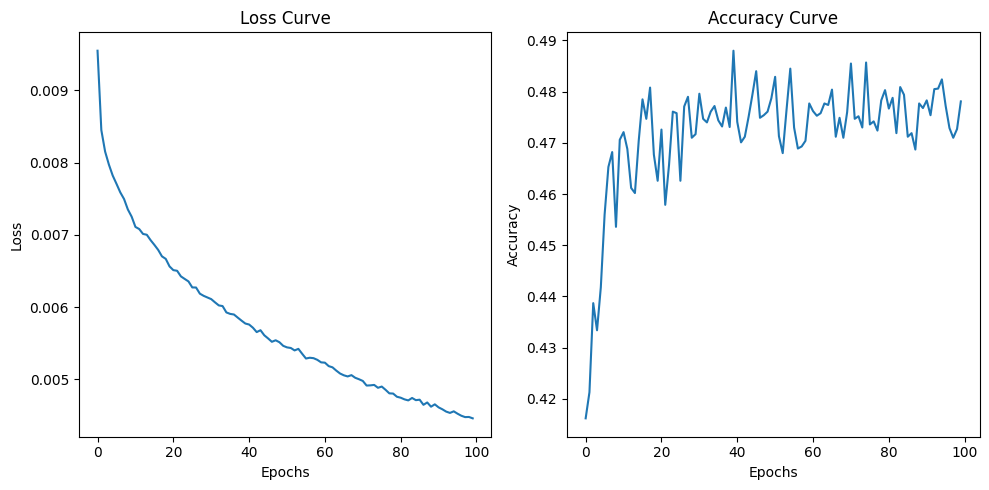

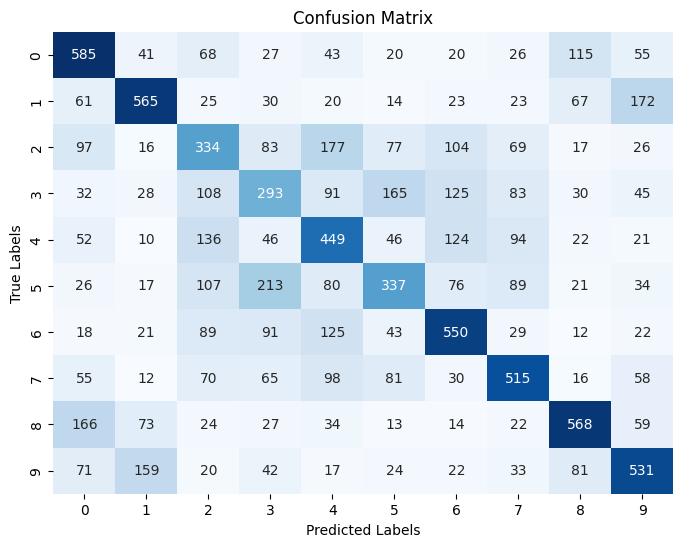

              precision    recall  f1-score   support

           0       0.50      0.58      0.54      1000
           1       0.60      0.56      0.58      1000
           2       0.34      0.33      0.34      1000
           3       0.32      0.29      0.31      1000
           4       0.40      0.45      0.42      1000
           5       0.41      0.34      0.37      1000
           6       0.51      0.55      0.53      1000
           7       0.52      0.52      0.52      1000
           8       0.60      0.57      0.58      1000
           9       0.52      0.53      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000

------- Important Metrics ------
Accuracy: 0.4727
F1: 0.47
Test time: 0.44869160652160645
Training time: 110.735680103302
Params count: 17802
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 10]
Hidden Layer Nums: 2
Activatio

In [ ]:
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)
# print(f'Test Accuracy: {test_accuracy}')

# Hyperparameter Optimizing

## Test for Batchsize

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 17802
Epoch 1/30, Loss: 0.00762709883621874, Validation Accuracy: 0.3841
Epoch 2/30, Loss: 0.006668648355741788, Validation Accuracy: 0.4216
Epoch 3/30, Loss: 0.006350783513033138, Validation Accuracy: 0.4384
Epoch 4/30, Loss: 0.006222829488436698, Validation Accuracy: 0.4326
Epoch 5/30, Loss: 0.006147778483831883, Validation Accuracy: 0.4503
Epoch 6/30, Loss: 0.006013718611671712, Validation Accuracy: 0.4383
Epoch 7/30, Loss: 0.005964411230504064, Validation Accuracy: 0.4419
Epoch 8/30, Loss: 0.005884002916832015, Validation Accuracy: 0.4612
Epoch 9/30, Loss: 0.005783164075393034, Validation Accuracy: 0.4497
Epoch 10/30, Loss: 0.0056212377563635806, Validation Accuracy: 0.4674
Epoch 11/30, Loss: 0.005625022307909029, Validation Accuracy: 0.4597
Epoch 12/30, Loss: 0.005578454667155349, Validat

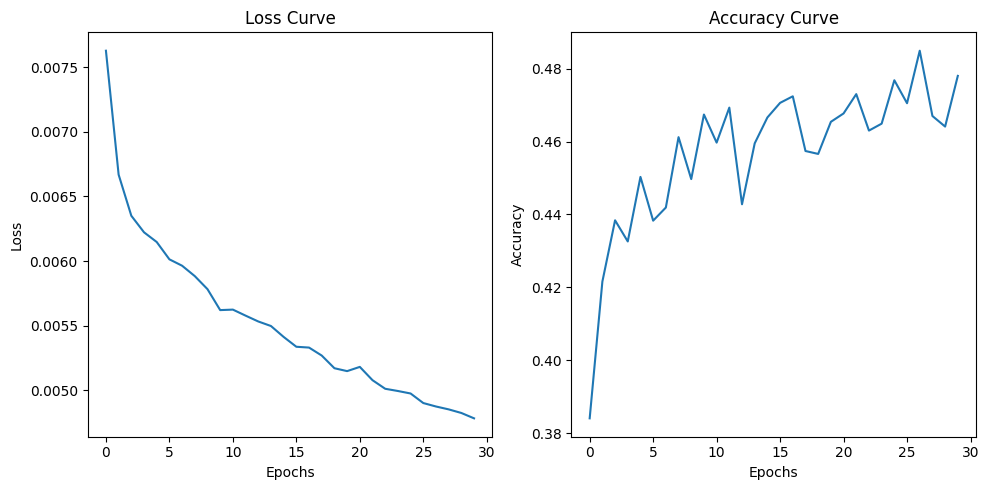

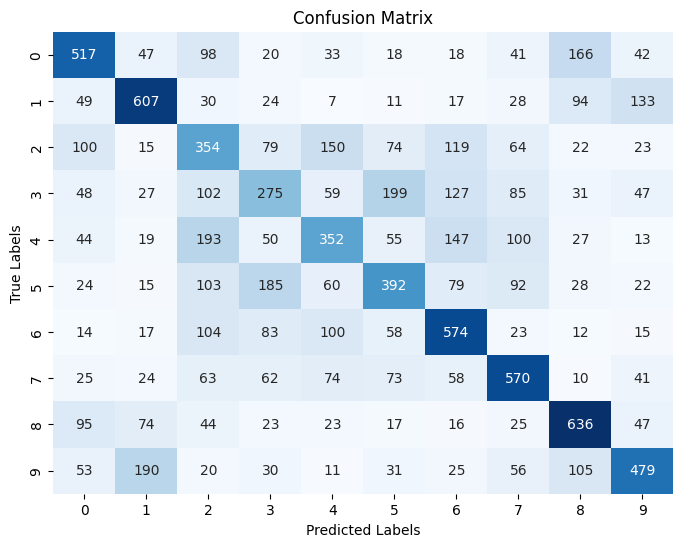

              precision    recall  f1-score   support

           0       0.53      0.52      0.53      1000
           1       0.59      0.61      0.60      1000
           2       0.32      0.35      0.34      1000
           3       0.33      0.28      0.30      1000
           4       0.41      0.35      0.38      1000
           5       0.42      0.39      0.41      1000
           6       0.49      0.57      0.53      1000
           7       0.53      0.57      0.55      1000
           8       0.56      0.64      0.60      1000
           9       0.56      0.48      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.47      0.48      0.47     10000
weighted avg       0.47      0.48      0.47     10000

------- Important Metrics ------
Accuracy: 0.4756
F1: 0.47
Test time: 0.5653815269470215
Training time: 25.688326835632324
Params count: 17802
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 10]
Hidden Layer Nums: 2
Activati

In [ ]:
###batchsize
layerSize = [128,128,10]
layerActivations = [None, 'relu', 'softmax']
learningRate_fit = 0.001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 256
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 17802
Epoch 1/30, Loss: 0.014844702763356208, Validation Accuracy: 0.399
Epoch 2/30, Loss: 0.013111920299235613, Validation Accuracy: 0.4306
Epoch 3/30, Loss: 0.0127142087119519, Validation Accuracy: 0.4048
Epoch 4/30, Loss: 0.012409340373244506, Validation Accuracy: 0.4378
Epoch 5/30, Loss: 0.012088359421845227, Validation Accuracy: 0.4439
Epoch 6/30, Loss: 0.011860247576110424, Validation Accuracy: 0.4436
Epoch 7/30, Loss: 0.011757813807150965, Validation Accuracy: 0.4539
Epoch 8/30, Loss: 0.011545999346062452, Validation Accuracy: 0.4537
Epoch 9/30, Loss: 0.011371430859080075, Validation Accuracy: 0.4557
Epoch 10/30, Loss: 0.01123086120109123, Validation Accuracy: 0.4567
Epoch 11/30, Loss: 0.01116501696359051, Validation Accuracy: 0.4669
Epoch 12/30, Loss: 0.011040420518488867, Validation A

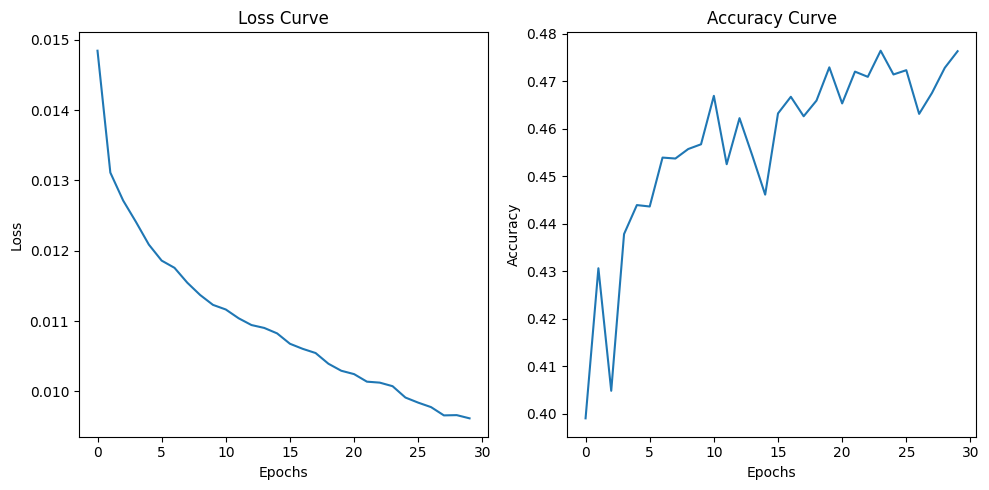

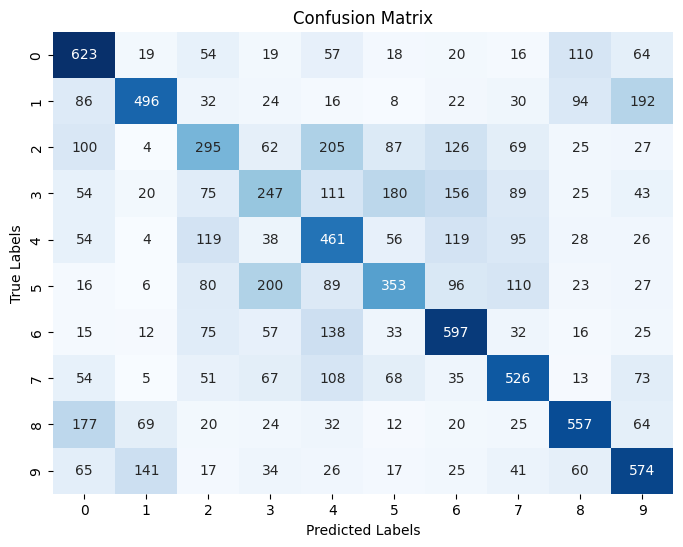

              precision    recall  f1-score   support

           0       0.50      0.62      0.56      1000
           1       0.64      0.50      0.56      1000
           2       0.36      0.29      0.32      1000
           3       0.32      0.25      0.28      1000
           4       0.37      0.46      0.41      1000
           5       0.42      0.35      0.39      1000
           6       0.49      0.60      0.54      1000
           7       0.51      0.53      0.52      1000
           8       0.59      0.56      0.57      1000
           9       0.51      0.57      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000

------- Important Metrics ------
Accuracy: 0.4729
F1: 0.47
Test time: 0.5600814819335938
Training time: 48.213080644607544
Params count: 17802
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 10]
Hidden Layer Nums: 2
Activati

In [ ]:
layerSize = [128,128,10]
layerActivations = [None, 'relu', 'softmax']
learningRate_fit = 0.001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 128
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 17802
Epoch 1/30, Loss: 0.028845886790434587, Validation Accuracy: 0.4237
Epoch 2/30, Loss: 0.025977594760596877, Validation Accuracy: 0.4248
Epoch 3/30, Loss: 0.025136881746264255, Validation Accuracy: 0.4414
Epoch 4/30, Loss: 0.02445709120434804, Validation Accuracy: 0.4392
Epoch 5/30, Loss: 0.024030304496691367, Validation Accuracy: 0.4367
Epoch 6/30, Loss: 0.023707793774698654, Validation Accuracy: 0.4375
Epoch 7/30, Loss: 0.0233328816463936, Validation Accuracy: 0.4517
Epoch 8/30, Loss: 0.023045433826234446, Validation Accuracy: 0.451
Epoch 9/30, Loss: 0.022810526182111435, Validation Accuracy: 0.4644
Epoch 10/30, Loss: 0.022362132134385045, Validation Accuracy: 0.4644
Epoch 11/30, Loss: 0.02224864544766737, Validation Accuracy: 0.459
Epoch 12/30, Loss: 0.021998627522530543, Validation Ac

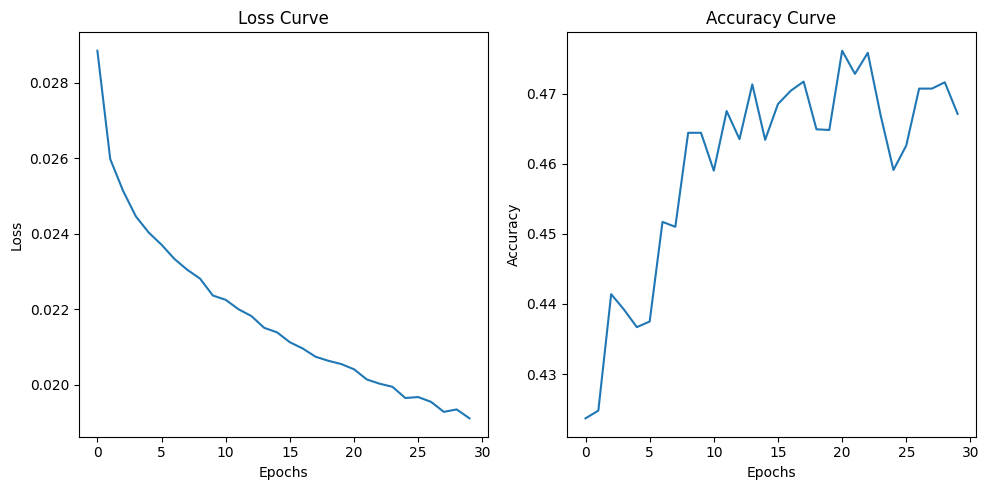

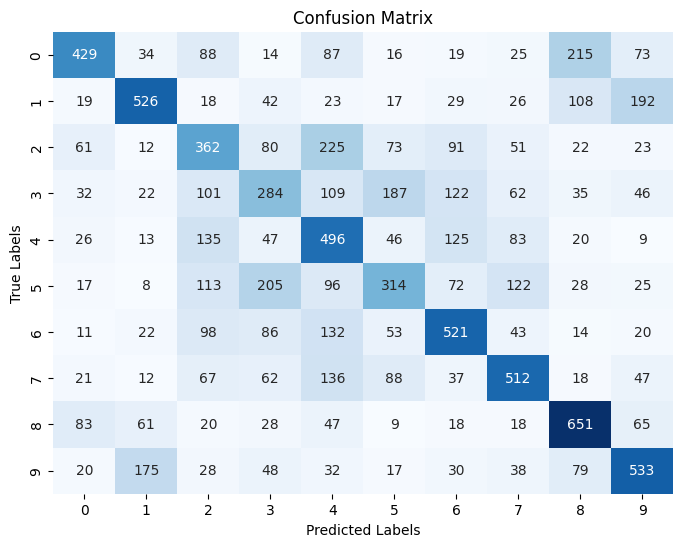

              precision    recall  f1-score   support

           0       0.60      0.43      0.50      1000
           1       0.59      0.53      0.56      1000
           2       0.35      0.36      0.36      1000
           3       0.32      0.28      0.30      1000
           4       0.36      0.50      0.42      1000
           5       0.38      0.31      0.35      1000
           6       0.49      0.52      0.50      1000
           7       0.52      0.51      0.52      1000
           8       0.55      0.65      0.59      1000
           9       0.52      0.53      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000

------- Important Metrics ------
Accuracy: 0.4628
F1: 0.46
Test time: 0.523967981338501
Training time: 35.44843125343323
Params count: 17802
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 10]
Hidden Layer Nums: 2
Activation

In [ ]:
layerSize = [128,128,10]
layerActivations = [None, 'relu', 'softmax']
learningRate_fit = 0.001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 64
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 17802
Epoch 1/30, Loss: 0.057725661046652964, Validation Accuracy: 0.4167
Epoch 2/30, Loss: 0.05189510046638767, Validation Accuracy: 0.4326
Epoch 3/30, Loss: 0.05029796222863227, Validation Accuracy: 0.4263
Epoch 4/30, Loss: 0.04885424180449063, Validation Accuracy: 0.4491
Epoch 5/30, Loss: 0.047977152166687694, Validation Accuracy: 0.4595
Epoch 6/30, Loss: 0.04704603038608352, Validation Accuracy: 0.4594
Epoch 7/30, Loss: 0.04634424042432382, Validation Accuracy: 0.4595
Epoch 8/30, Loss: 0.04586908711964918, Validation Accuracy: 0.4515
Epoch 9/30, Loss: 0.045099583540174924, Validation Accuracy: 0.4669
Epoch 10/30, Loss: 0.044630621076775415, Validation Accuracy: 0.4518
Epoch 11/30, Loss: 0.04433952271958271, Validation Accuracy: 0.4597
Epoch 12/30, Loss: 0.04376818166530944, Validation Accu

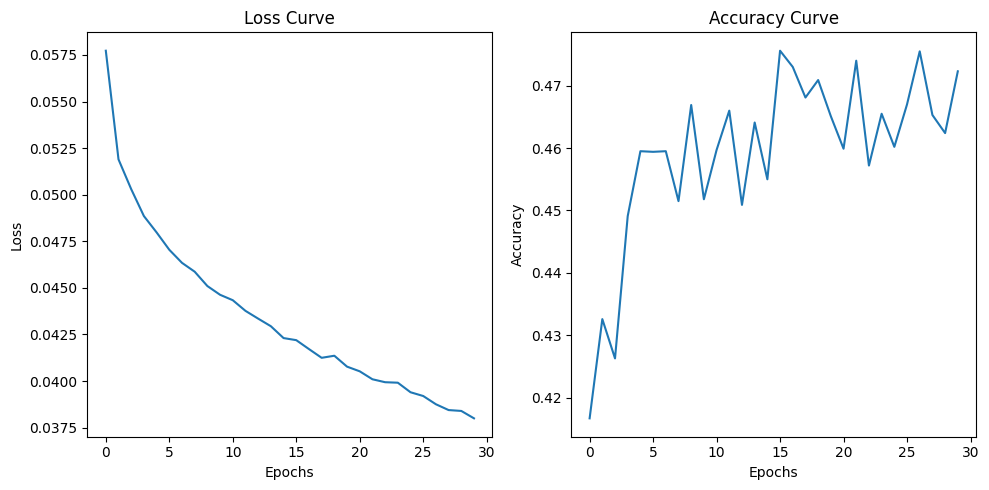

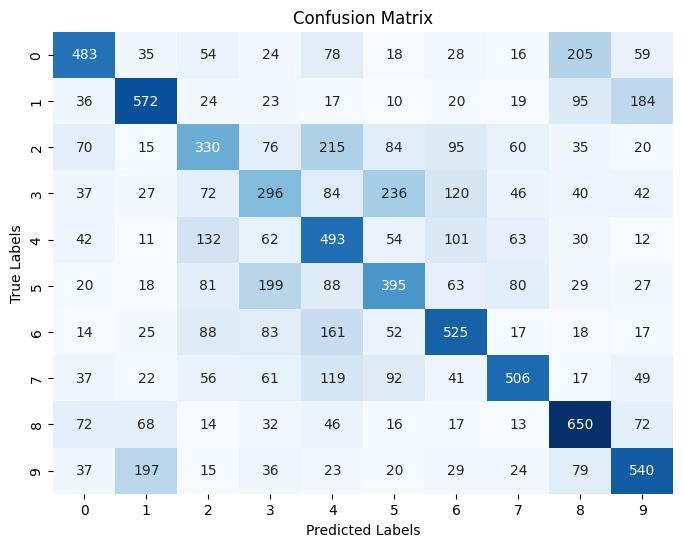

              precision    recall  f1-score   support

           0       0.57      0.48      0.52      1000
           1       0.58      0.57      0.57      1000
           2       0.38      0.33      0.35      1000
           3       0.33      0.30      0.31      1000
           4       0.37      0.49      0.42      1000
           5       0.40      0.40      0.40      1000
           6       0.51      0.53      0.51      1000
           7       0.60      0.51      0.55      1000
           8       0.54      0.65      0.59      1000
           9       0.53      0.54      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000

------- Important Metrics ------
Accuracy: 0.479
F1: 0.48
Test time: 0.5413343906402588
Training time: 33.22859501838684
Params count: 17802
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 10]
Hidden Layer Nums: 2
Activation

In [ ]:
layerSize = [128,128,10]
layerActivations = [None, 'relu', 'softmax']
learningRate_fit = 0.001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

## Test for Learning rate

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 17802
Epoch 1/20, Loss: 0.05637600674801994, Validation Accuracy: 0.4196
Epoch 2/20, Loss: 0.0494083128831394, Validation Accuracy: 0.446
Epoch 3/20, Loss: 0.047035463702182694, Validation Accuracy: 0.4603
Epoch 4/20, Loss: 0.04554125889211796, Validation Accuracy: 0.469
Epoch 5/20, Loss: 0.044225464443084055, Validation Accuracy: 0.481
Epoch 6/20, Loss: 0.04327764688356992, Validation Accuracy: 0.4919
Epoch 7/20, Loss: 0.042404666844998926, Validation Accuracy: 0.4934
Epoch 8/20, Loss: 0.04163935021710495, Validation Accuracy: 0.4962
Epoch 9/20, Loss: 0.040962508361975895, Validation Accuracy: 0.4964
Epoch 10/20, Loss: 0.040341933493250354, Validation Accuracy: 0.4981
Epoch 11/20, Loss: 0.03986961932204601, Validation Accuracy: 0.506
Epoch 12/20, Loss: 0.03933379773208603, Validation Accuracy

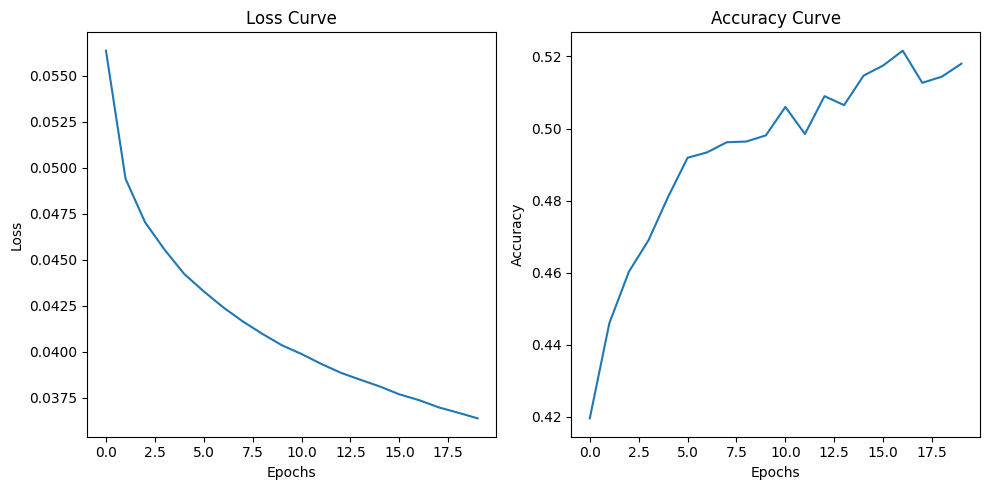

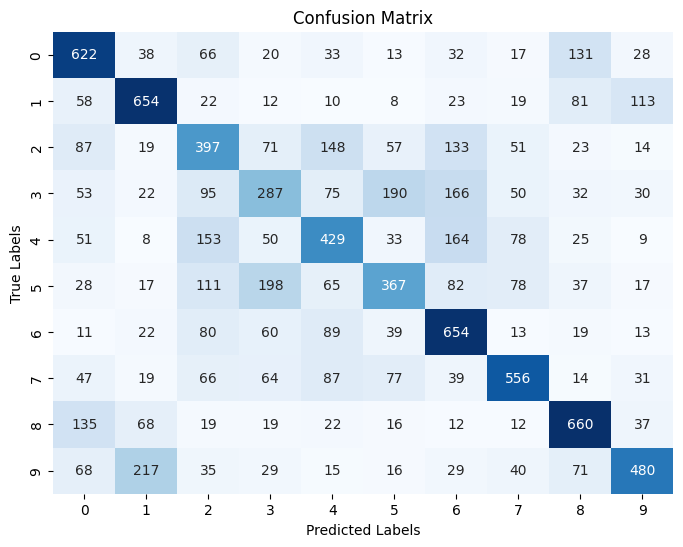

              precision    recall  f1-score   support

           0       0.54      0.62      0.58      1000
           1       0.60      0.65      0.63      1000
           2       0.38      0.40      0.39      1000
           3       0.35      0.29      0.32      1000
           4       0.44      0.43      0.43      1000
           5       0.45      0.37      0.40      1000
           6       0.49      0.65      0.56      1000
           7       0.61      0.56      0.58      1000
           8       0.60      0.66      0.63      1000
           9       0.62      0.48      0.54      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

------- Important Metrics ------
Accuracy: 0.5106
F1: 0.51
Test time: 0.557750940322876
Training time: 24.336880683898926
Params count: 17802
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 10]
Hidden Layer Nums: 2
Activatio

In [ ]:
###learning rate
layerSize = [128,128,10]
layerActivations = [None, 'relu', 'softmax']
learningRate_fit = 0.0001
epochs_fit = 20
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 17802
Epoch 1/30, Loss: 0.05448491849085251, Validation Accuracy: 0.4259
Epoch 2/30, Loss: 0.048298399815536644, Validation Accuracy: 0.461
Epoch 3/30, Loss: 0.045922709108882846, Validation Accuracy: 0.4746
Epoch 4/30, Loss: 0.04456958470642052, Validation Accuracy: 0.4785
Epoch 5/30, Loss: 0.043460100492497676, Validation Accuracy: 0.4699
Epoch 6/30, Loss: 0.04256637014050629, Validation Accuracy: 0.4902
Epoch 7/30, Loss: 0.041769627044958985, Validation Accuracy: 0.4892
Epoch 8/30, Loss: 0.04112208010231948, Validation Accuracy: 0.4926
Epoch 9/30, Loss: 0.040523006065483216, Validation Accuracy: 0.5024
Epoch 10/30, Loss: 0.04000553203063486, Validation Accuracy: 0.5013
Epoch 11/30, Loss: 0.03941807711933099, Validation Accuracy: 0.5062
Epoch 12/30, Loss: 0.039052133980961024, Validation Acc

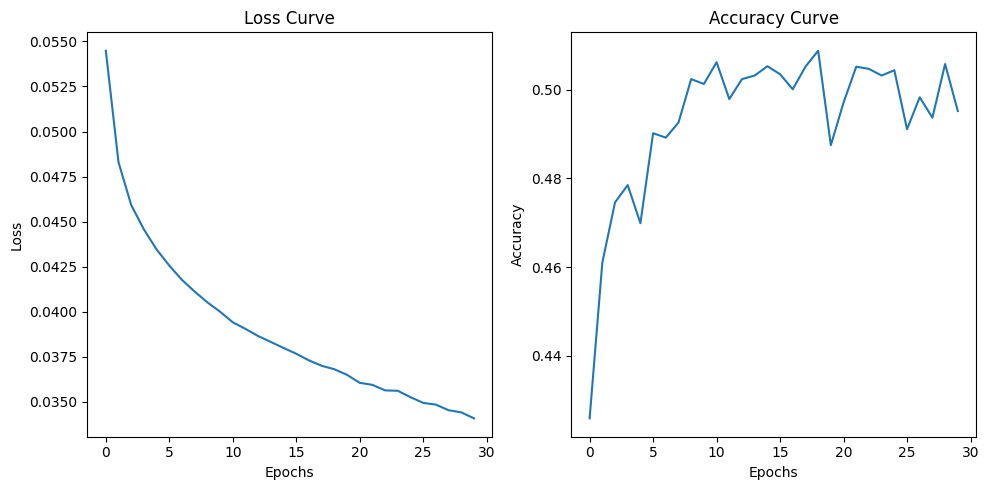

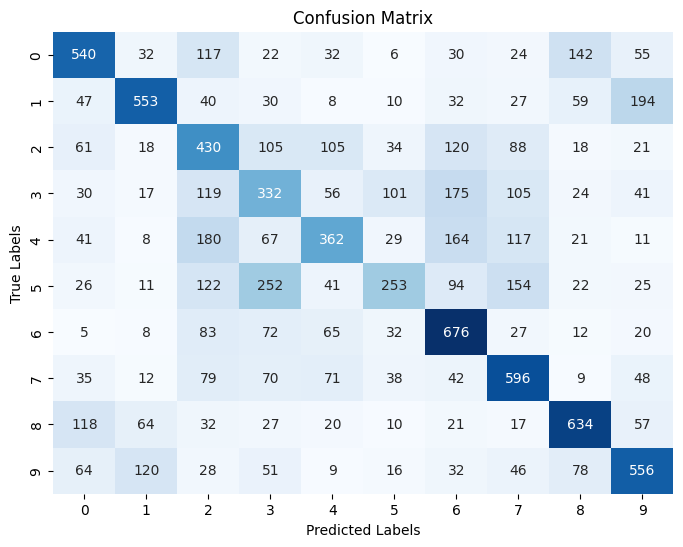

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1000
           1       0.66      0.55      0.60      1000
           2       0.35      0.43      0.39      1000
           3       0.32      0.33      0.33      1000
           4       0.47      0.36      0.41      1000
           5       0.48      0.25      0.33      1000
           6       0.49      0.68      0.57      1000
           7       0.50      0.60      0.54      1000
           8       0.62      0.63      0.63      1000
           9       0.54      0.56      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000

------- Important Metrics ------
Accuracy: 0.4932
F1: 0.49
Test time: 0.8624575138092041
Training time: 42.906368017196655
Params count: 17802
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 10]
Hidden Layer Nums: 2
Activati

In [ ]:
layerSize = [128,128,10]
layerActivations = [None, 'relu', 'softmax']
learningRate_fit = 0.0005
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 17802
Epoch 1/30, Loss: 0.057646394135341894, Validation Accuracy: 0.4022
Epoch 2/30, Loss: 0.05183095713087071, Validation Accuracy: 0.4169
Epoch 3/30, Loss: 0.05019572707779138, Validation Accuracy: 0.4253
Epoch 4/30, Loss: 0.048764010264928194, Validation Accuracy: 0.4344
Epoch 5/30, Loss: 0.04783658688885377, Validation Accuracy: 0.4583
Epoch 6/30, Loss: 0.04713282120440541, Validation Accuracy: 0.4648
Epoch 7/30, Loss: 0.046546910406938764, Validation Accuracy: 0.4607
Epoch 8/30, Loss: 0.0457743837516565, Validation Accuracy: 0.4392
Epoch 9/30, Loss: 0.04542400032903567, Validation Accuracy: 0.4692
Epoch 10/30, Loss: 0.044911062760860286, Validation Accuracy: 0.4696
Epoch 11/30, Loss: 0.04395547063768969, Validation Accuracy: 0.4644
Epoch 12/30, Loss: 0.04385514165213858, Validation Accur

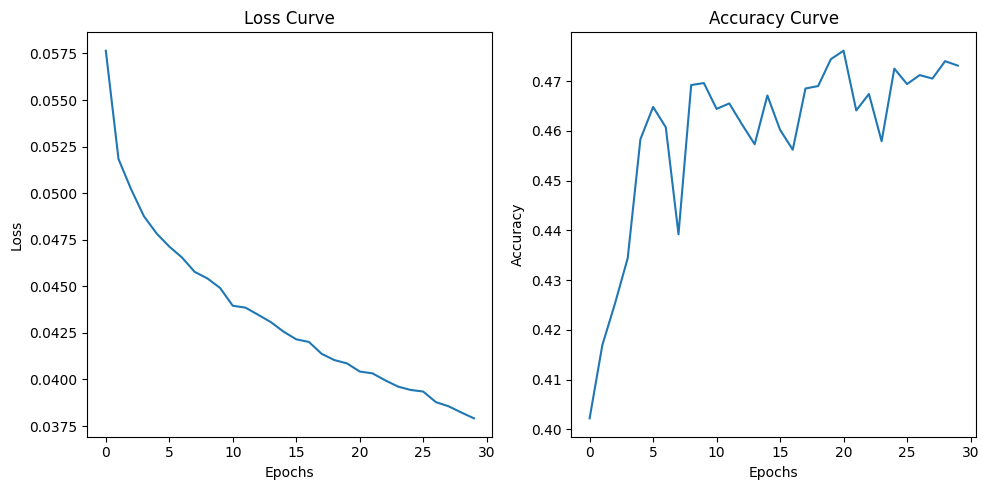

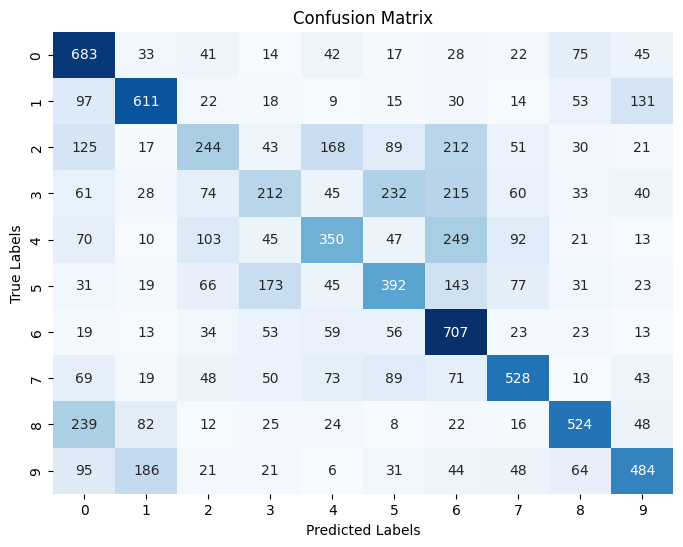

              precision    recall  f1-score   support

           0       0.46      0.68      0.55      1000
           1       0.60      0.61      0.61      1000
           2       0.37      0.24      0.29      1000
           3       0.32      0.21      0.26      1000
           4       0.43      0.35      0.38      1000
           5       0.40      0.39      0.40      1000
           6       0.41      0.71      0.52      1000
           7       0.57      0.53      0.55      1000
           8       0.61      0.52      0.56      1000
           9       0.56      0.48      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000

------- Important Metrics ------
Accuracy: 0.4735
F1: 0.46
Test time: 1.0393211841583252
Training time: 52.53121876716614
Params count: 17802
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 10]
Hidden Layer Nums: 2
Activatio

In [ ]:
layerSize = [128,128,10]
layerActivations = [None, 'relu', 'softmax']
learningRate_fit = 0.001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Layer number

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: relu
Total params: 17802
Epoch 1/30, Loss: 0.21299821004224145, Validation Accuracy: 0.3794
Epoch 2/30, Loss: 0.10579517499308784, Validation Accuracy: 0.4011
Epoch 3/30, Loss: 0.09653739607625546, Validation Accuracy: 0.4192
Epoch 4/30, Loss: 0.09399206166921747, Validation Accuracy: 0.4322
Epoch 5/30, Loss: 0.09260314329155135, Validation Accuracy: 0.4326
Epoch 6/30, Loss: 0.0910743661405096, Validation Accuracy: 0.4484
Epoch 7/30, Loss: 0.08891309689676942, Validation Accuracy: 0.4494
Epoch 8/30, Loss: 0.08859913338012342, Validation Accuracy: 0.4557
Epoch 9/30, Loss: 0.08627764356623877, Validation Accuracy: 0.4575
Epoch 10/30, Loss: 0.08632861376982787, Validation Accuracy: 0.4549
Epoch 11/30, Loss: 0.08481106143296736, Validation Accuracy: 0.4713
Epoch 12/30, Loss: 0.08375991128572212, Validation Accuracy: 0.

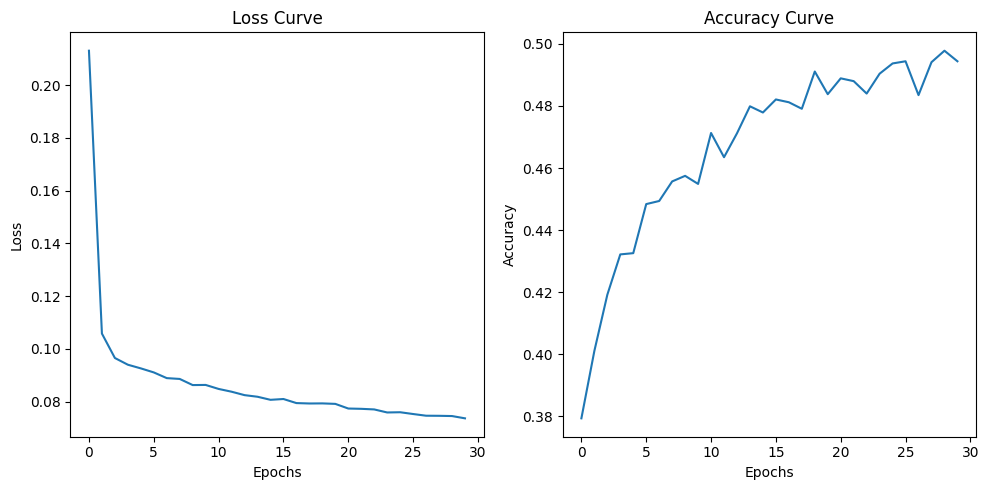

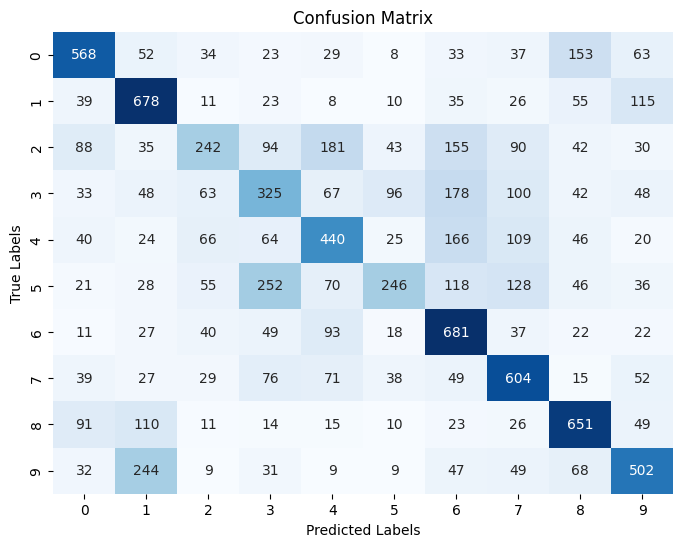

              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1000
           1       0.53      0.68      0.60      1000
           2       0.43      0.24      0.31      1000
           3       0.34      0.33      0.33      1000
           4       0.45      0.44      0.44      1000
           5       0.49      0.25      0.33      1000
           6       0.46      0.68      0.55      1000
           7       0.50      0.60      0.55      1000
           8       0.57      0.65      0.61      1000
           9       0.54      0.50      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000

------- Important Metrics ------
Accuracy: 0.4937
F1: 0.48
Test time: 0.2975485324859619
Training time: 33.700984954833984
Params count: 17802
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 10]
Hidden Layer Nums: 2
Activati

In [ ]:
layerSize = [128,128,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 34314
Epoch 1/20, Loss: 0.05614327310541204, Validation Accuracy: 0.4121
Epoch 2/20, Loss: 0.04870110838702505, Validation Accuracy: 0.449
Epoch 3/20, Loss: 0.0458207275944355, Validation Accuracy: 0.4726
Epoch 4/20, Loss: 0.04385765533080385, Validation Accuracy: 0.4807
Epoch 5/20, Loss: 0.04219278635496294, Validation Accuracy: 0.4857
Epoch 6/20, Loss: 0.04086372959240765, Validation Accuracy: 0.4934
Epoch 7/20, Loss: 0.039718146803042885, Validation Accuracy: 0.4955
Epoch 8/20, Loss: 0.03863327967460366, Validation Accuracy: 0.4998
Epoch 9/20, Loss: 0.03769252688324453, Validation Accuracy: 0.5041
Epoch 10/20, Loss: 0.03686433803822976, Validation Accuracy: 0.4981
Epoch 11/20, Loss: 0.03610484027478287

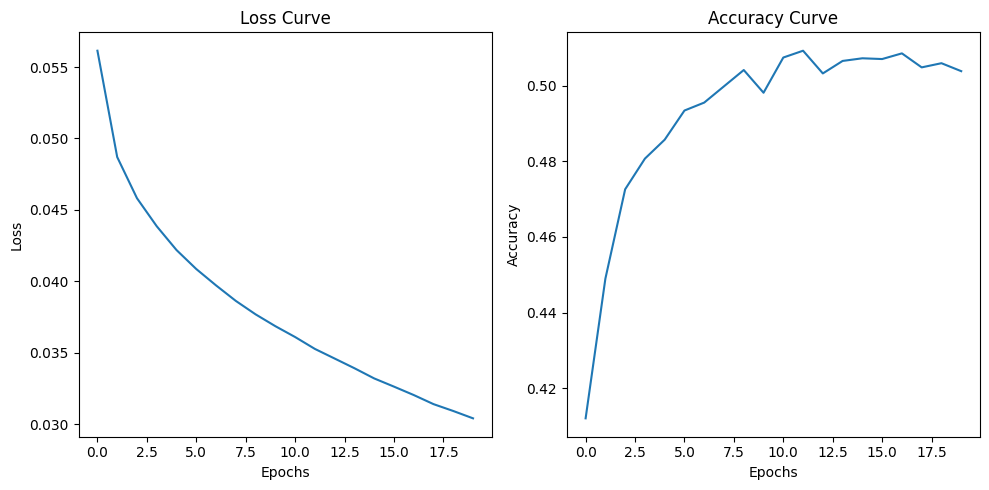

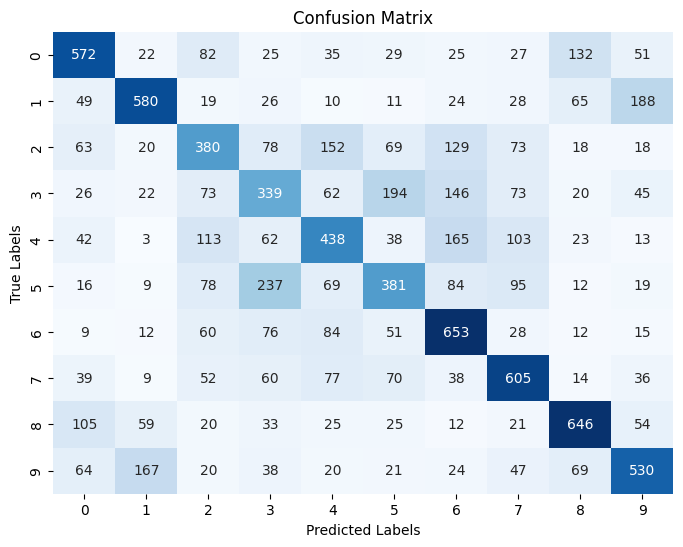

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1000
           1       0.64      0.58      0.61      1000
           2       0.42      0.38      0.40      1000
           3       0.35      0.34      0.34      1000
           4       0.45      0.44      0.44      1000
           5       0.43      0.38      0.40      1000
           6       0.50      0.65      0.57      1000
           7       0.55      0.60      0.58      1000
           8       0.64      0.65      0.64      1000
           9       0.55      0.53      0.54      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

------- Important Metrics ------
Accuracy: 0.5124
F1: 0.51
Test time: 0.7192955017089844
Training time: 43.376195192337036
Params count: 34314
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 128, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,128,128,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 20
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 50826
Epoch 1/30, Loss: 0.05638073730435168, Validation Accuracy: 0.4213
Epoch 2/30, Loss: 0.04900386839357566, Validation Accuracy: 0.4416
Epoch 3/30, Loss: 0.04600728880474065, Validation Accuracy: 0.4654
Epoch 4/30, Loss: 0.04379202865069467, Validation Accuracy: 0.4757
Epoch 5/30, Loss: 0.04204494175642488, Validation Accuracy: 0.4851
Epoch 6/30, Loss: 0.040535108356337335, Validation Accuracy: 0.4917
Epoch 7/30, Loss: 0.039191930942030315, Validation Accuracy: 0.4862
Epoch 8/30, Loss: 0.03792581281430683, Validation Accuracy: 0.4928
Epoch 9/30, Loss: 0.03679776092957754, Validation Accuracy: 0.49
Epoch 10/30, Lo

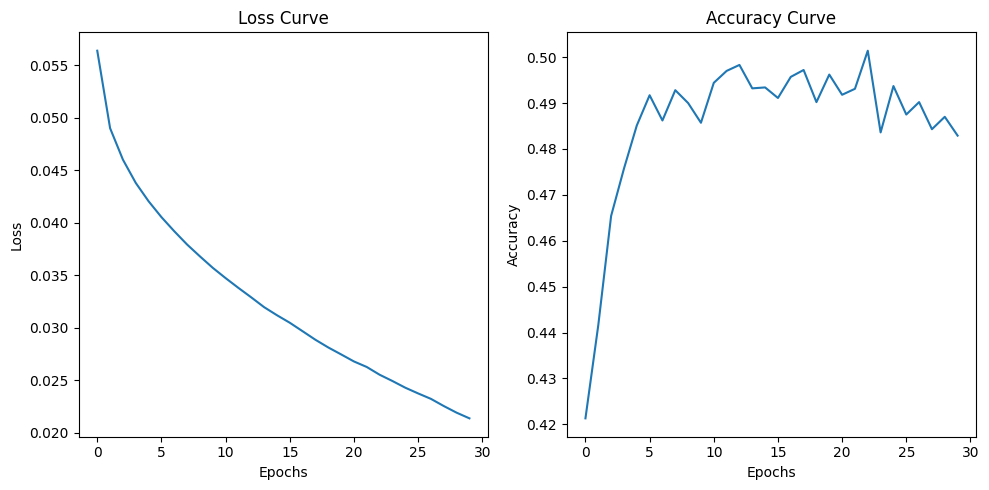

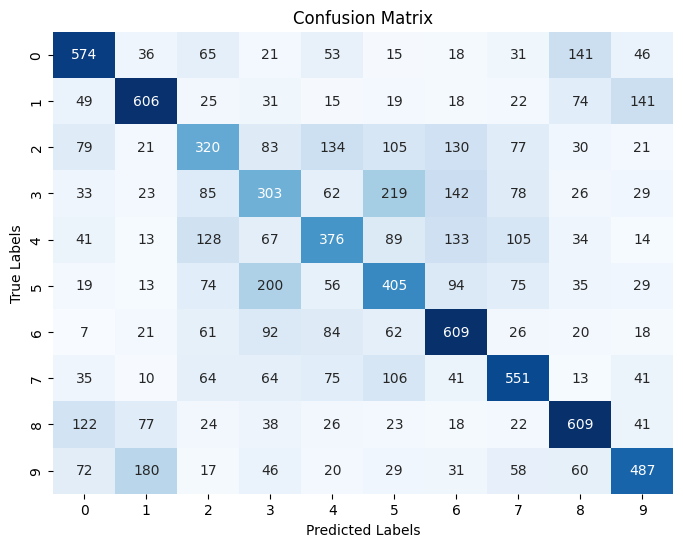

              precision    recall  f1-score   support

           0       0.56      0.57      0.57      1000
           1       0.61      0.61      0.61      1000
           2       0.37      0.32      0.34      1000
           3       0.32      0.30      0.31      1000
           4       0.42      0.38      0.40      1000
           5       0.38      0.41      0.39      1000
           6       0.49      0.61      0.55      1000
           7       0.53      0.55      0.54      1000
           8       0.58      0.61      0.60      1000
           9       0.56      0.49      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000

------- Important Metrics ------
Accuracy: 0.484
F1: 0.48
Test time: 0.8396885395050049
Training time: 95.17737555503845
Params count: 50826
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 128, 128, 10]
Hidden Layer Nums: 4


In [ ]:
layerSize = [128,128,128,128,10]
layerActivations = [None, 'relu', "relu","relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

neurons number

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/20, Loss: 0.05475237093349902, Validation Accuracy: 0.437
Epoch 2/20, Loss: 0.04704583406209324, Validation Accuracy: 0.4683
Epoch 3/20, Loss: 0.04370299367651505, Validation Accuracy: 0.4816
Epoch 4/20, Loss: 0.04115593874858506, Validation Accuracy: 0.4947
Epoch 5/20, Loss: 0.03902739240581451, Validation Accuracy: 0.5045
Epoch 6/20, Loss: 0.03716485770520056, Validation Accuracy: 0.508
Epoch 7/20, Loss: 0.035429182231886513, Validation Accuracy: 0.5045
Epoch 8/20, Loss: 0.03390270734117892, Validation Accuracy: 0.5131
Epoch 9/20, Loss: 0.032451582655858055, Validation Accuracy: 0.5149
Epoch 10/20, Loss: 0.0309396275570496, Validation Accuracy: 0.5162
Epoch 11/20, Loss: 0.0295603580505045

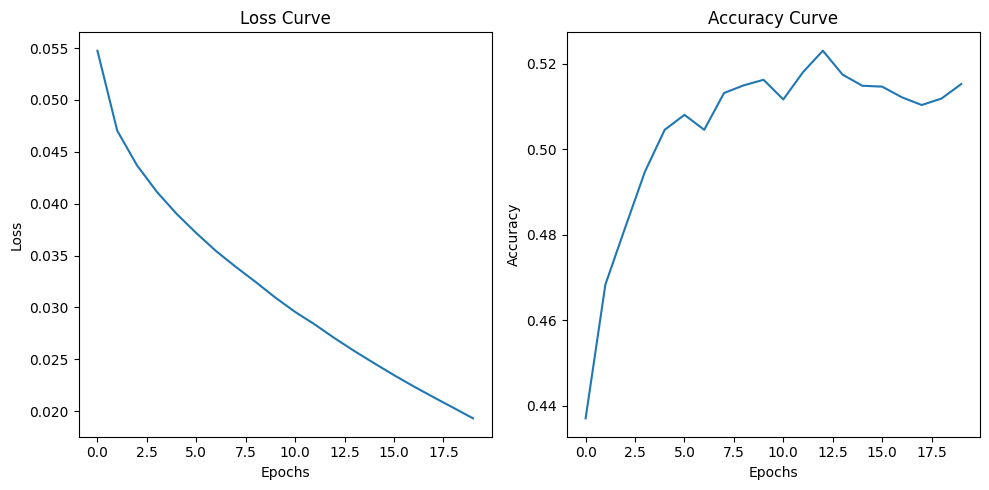

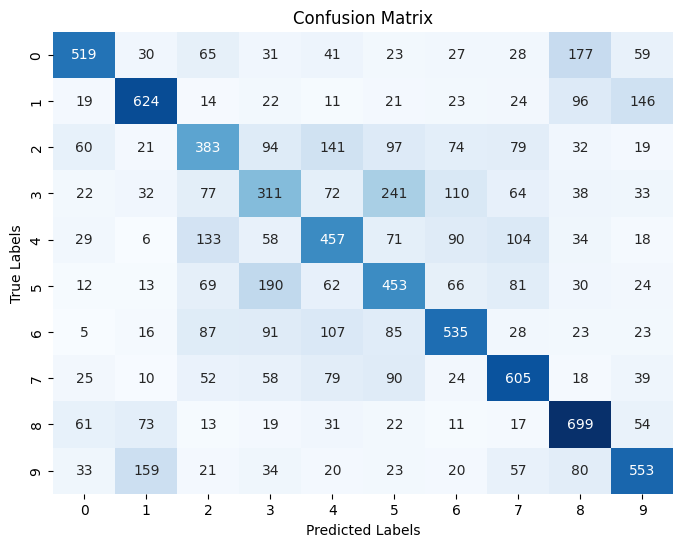

              precision    recall  f1-score   support

           0       0.66      0.52      0.58      1000
           1       0.63      0.62      0.63      1000
           2       0.42      0.38      0.40      1000
           3       0.34      0.31      0.33      1000
           4       0.45      0.46      0.45      1000
           5       0.40      0.45      0.43      1000
           6       0.55      0.54      0.54      1000
           7       0.56      0.60      0.58      1000
           8       0.57      0.70      0.63      1000
           9       0.57      0.55      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000

------- Important Metrics ------
Accuracy: 0.5139
F1: 0.51
Test time: 1.5693047046661377
Training time: 94.00083541870117
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 16512 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 1290 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 34314
Epoch 1/20, Loss: 0.05630879545736013, Validation Accuracy: 0.4178
Epoch 2/20, Loss: 0.048833680163921, Validation Accuracy: 0.4451
Epoch 3/20, Loss: 0.046052080777636686, Validation Accuracy: 0.4671
Epoch 4/20, Loss: 0.04415803741051951, Validation Accuracy: 0.4723
Epoch 5/20, Loss: 0.04259364677584667, Validation Accuracy: 0.4844
Epoch 6/20, Loss: 0.0412144980037851, Validation Accuracy: 0.4903
Epoch 7/20, Loss: 0.04004075939962818, Validation Accuracy: 0.4904
Epoch 8/20, Loss: 0.03893024886921641, Validation Accuracy: 0.4984
Epoch 9/20, Loss: 0.03799518170192332, Validation Accuracy: 0.4963
Epoch 10/20, Loss: 0.03706545780360766, Validation Accuracy: 0.5062
Epoch 11/20, Loss: 0.03621406556055837,

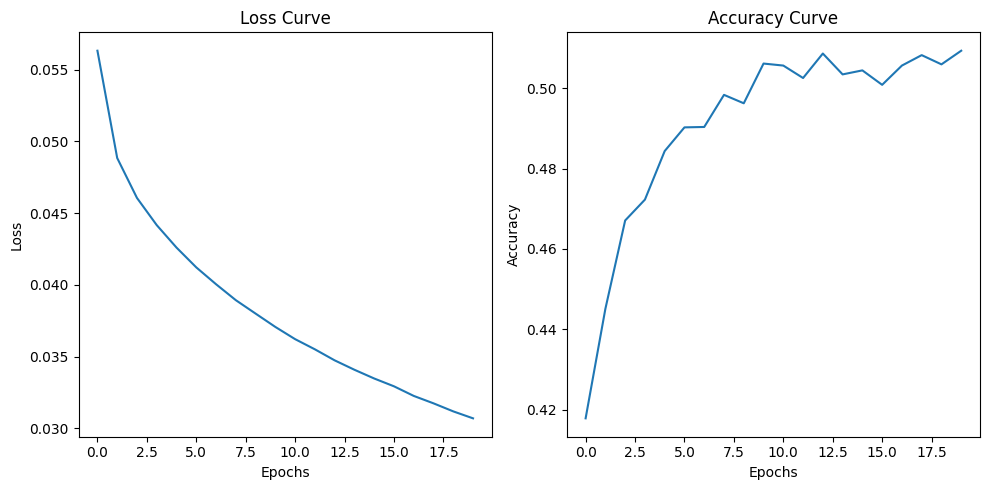

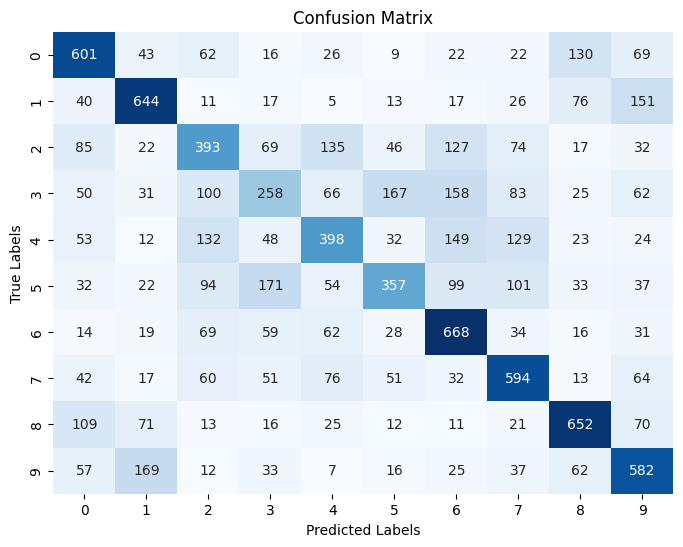

              precision    recall  f1-score   support

           0       0.55      0.60      0.58      1000
           1       0.61      0.64      0.63      1000
           2       0.42      0.39      0.40      1000
           3       0.35      0.26      0.30      1000
           4       0.47      0.40      0.43      1000
           5       0.49      0.36      0.41      1000
           6       0.51      0.67      0.58      1000
           7       0.53      0.59      0.56      1000
           8       0.62      0.65      0.64      1000
           9       0.52      0.58      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

------- Important Metrics ------
Accuracy: 0.5147
F1: 0.51
Test time: 0.6841723918914795
Training time: 52.96741509437561
Params count: 34314
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 128, 128, 10]
Hidden Layer Nums: 3
Acti

In [ ]:
layerSize = [128,128,128,10]
layerActivations = [None, 'relu',"relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 20
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 8256 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 4160 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 650 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 13066
Epoch 1/20, Loss: 0.05756136153228274, Validation Accuracy: 0.4018
Epoch 2/20, Loss: 0.050579775143044216, Validation Accuracy: 0.4314
Epoch 3/20, Loss: 0.0480744988060595, Validation Accuracy: 0.4444
Epoch 4/20, Loss: 0.04636028511561784, Validation Accuracy: 0.4631
Epoch 5/20, Loss: 0.04504414096930478, Validation Accuracy: 0.4744
Epoch 6/20, Loss: 0.04402699885498463, Validation Accuracy: 0.4741
Epoch 7/20, Loss: 0.04309497349682364, Validation Accuracy: 0.4809
Epoch 8/20, Loss: 0.04234904120875008, Validation Accuracy: 0.4861
Epoch 9/20, Loss: 0.041668451752246975, Validation Accuracy: 0.4906
Epoch 10/20, Loss: 0.041083740258207394, Validation Accuracy: 0.4989
Epoch 11/20, Loss: 0.04051818043029556

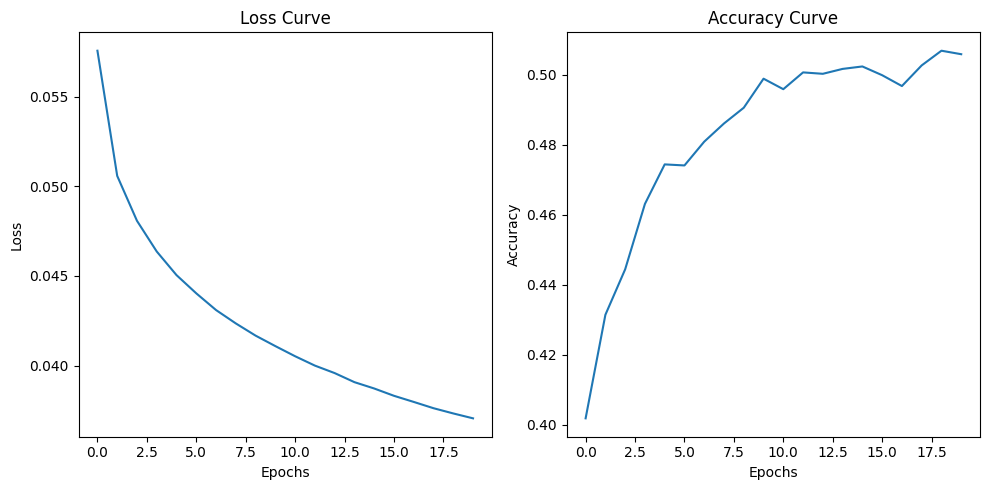

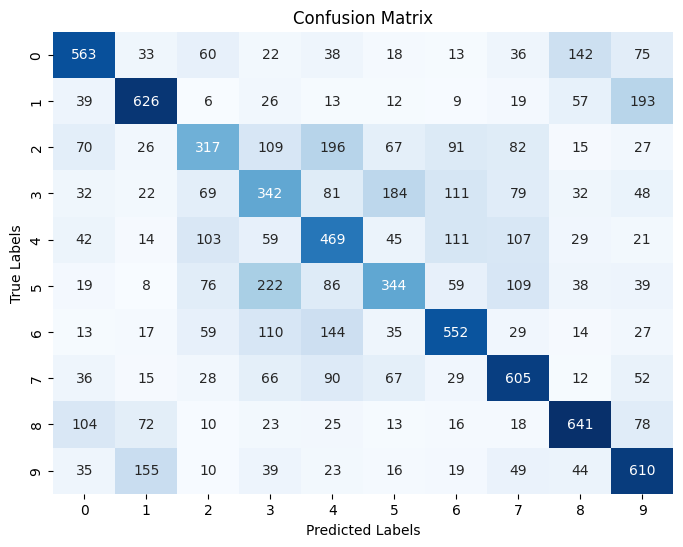

              precision    recall  f1-score   support

           0       0.59      0.56      0.58      1000
           1       0.63      0.63      0.63      1000
           2       0.43      0.32      0.36      1000
           3       0.34      0.34      0.34      1000
           4       0.40      0.47      0.43      1000
           5       0.43      0.34      0.38      1000
           6       0.55      0.55      0.55      1000
           7       0.53      0.60      0.57      1000
           8       0.63      0.64      0.63      1000
           9       0.52      0.61      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.50      0.51      0.50     10000
weighted avg       0.50      0.51      0.50     10000

------- Important Metrics ------
Accuracy: 0.5069
F1: 0.5
Test time: 0.3329274654388428
Training time: 18.325226068496704
Params count: 13066
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 64, 64, 10]
Hidden Layer Nums: 3
Activa

In [ ]:
layerSize = [128,64,64,10]
layerActivations = [None, "relu","relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 20
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

## Momentum

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/20, Loss: 0.05496174367864603, Validation Accuracy: 0.4281
Epoch 2/20, Loss: 0.04727252451236601, Validation Accuracy: 0.4672
Epoch 3/20, Loss: 0.04397038114244973, Validation Accuracy: 0.4781
Epoch 4/20, Loss: 0.04152639060267189, Validation Accuracy: 0.4957
Epoch 5/20, Loss: 0.039488805976858506, Validation Accuracy: 0.5002
Epoch 6/20, Loss: 0.03760244504679128, Validation Accuracy: 0.5076
Epoch 7/20, Loss: 0.035866564861510034, Validation Accuracy: 0.5035
Epoch 8/20, Loss: 0.03429208402264454, Validation Accuracy: 0.5148
Epoch 9/20, Loss: 0.0328119758121671, Validation Accuracy: 0.5172
Epoch 10/20, Loss: 0.031357086073816154, Validation Accuracy: 0.5128
Epoch 11/20, Loss: 0.0299992538075

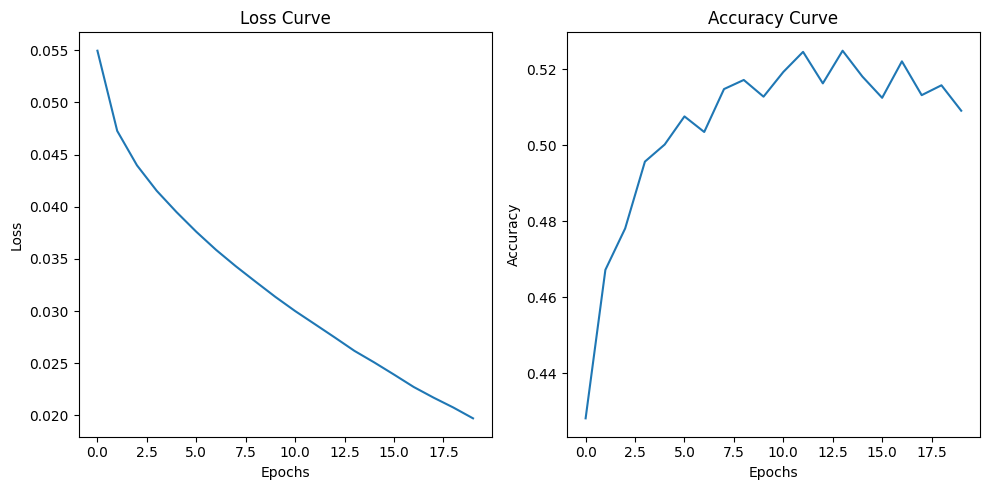

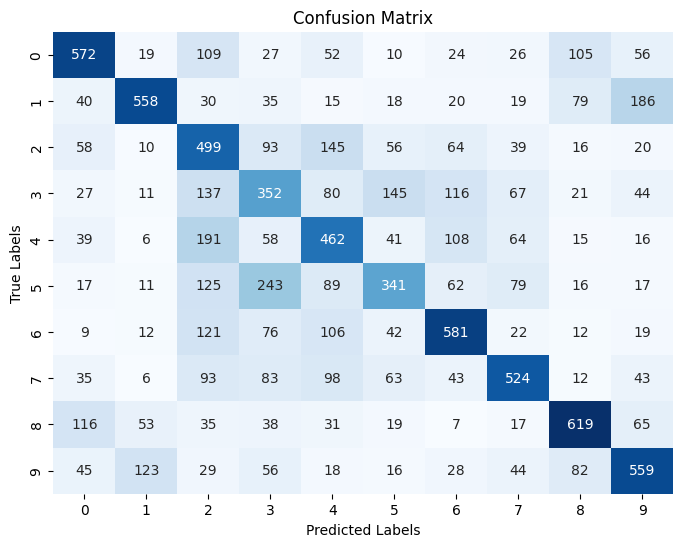

              precision    recall  f1-score   support

           0       0.60      0.57      0.58      1000
           1       0.69      0.56      0.62      1000
           2       0.36      0.50      0.42      1000
           3       0.33      0.35      0.34      1000
           4       0.42      0.46      0.44      1000
           5       0.45      0.34      0.39      1000
           6       0.55      0.58      0.57      1000
           7       0.58      0.52      0.55      1000
           8       0.63      0.62      0.63      1000
           9       0.55      0.56      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000

------- Important Metrics ------
Accuracy: 0.5067
F1: 0.51
Test time: 1.3712503910064697
Training time: 90.7705590724945
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Acti

In [ ]:
## momentum
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 20
lr_decay_fit = 0.99
momentum_fit = 0.9
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/10, Loss: 0.05365575563191673, Validation Accuracy: 0.4351
Epoch 2/10, Loss: 0.04574621189686813, Validation Accuracy: 0.463
Epoch 3/10, Loss: 0.04221745510815165, Validation Accuracy: 0.4824
Epoch 4/10, Loss: 0.03954446950817845, Validation Accuracy: 0.5004
Epoch 5/10, Loss: 0.03720977618589708, Validation Accuracy: 0.5051
Epoch 6/10, Loss: 0.035137794712257, Validation Accuracy: 0.5095
Epoch 7/10, Loss: 0.033225749849551504, Validation Accuracy: 0.5104
Epoch 8/10, Loss: 0.03152168572512907, Validation Accuracy: 0.5073
Epoch 9/10, Loss: 0.029729955783913454, Validation Accuracy: 0.507
Epoch 10/10, Loss: 0.028300002093712594, Validation Accuracy: 0.5118


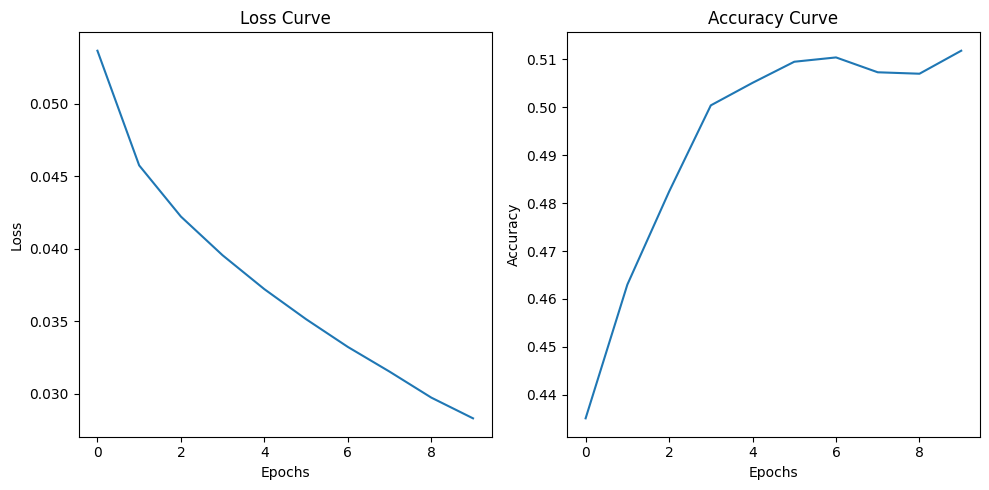

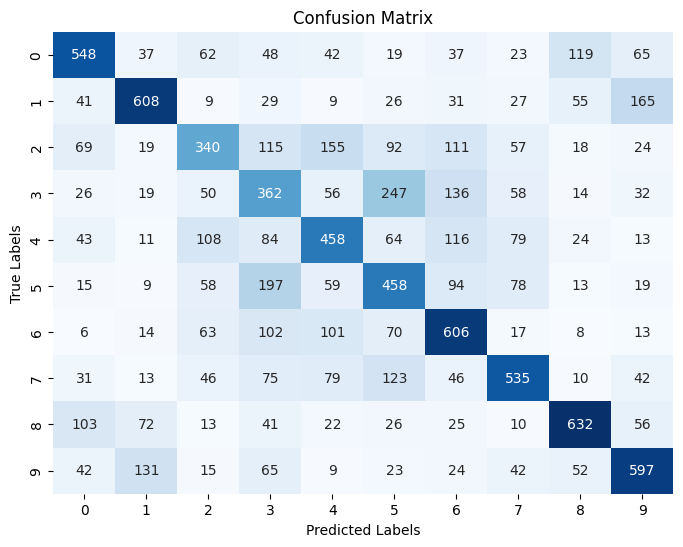

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1000
           1       0.65      0.61      0.63      1000
           2       0.45      0.34      0.39      1000
           3       0.32      0.36      0.34      1000
           4       0.46      0.46      0.46      1000
           5       0.40      0.46      0.43      1000
           6       0.49      0.61      0.54      1000
           7       0.58      0.54      0.56      1000
           8       0.67      0.63      0.65      1000
           9       0.58      0.60      0.59      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.52     10000
weighted avg       0.52      0.51      0.52     10000

------- Important Metrics ------
Accuracy: 0.5144
F1: 0.52
Test time: 0.9436466693878174
Training time: 40.989415884017944
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Ac

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 10
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/20, Loss: 0.05334498900873874, Validation Accuracy: 0.4429
Epoch 2/20, Loss: 0.04633926119997469, Validation Accuracy: 0.4697
Epoch 3/20, Loss: 0.04359148314302575, Validation Accuracy: 0.4683
Epoch 4/20, Loss: 0.041041071157213754, Validation Accuracy: 0.4881
Epoch 5/20, Loss: 0.03921752016561745, Validation Accuracy: 0.4845
Epoch 6/20, Loss: 0.0372100619576155, Validation Accuracy: 0.5016
Epoch 7/20, Loss: 0.03574521636488189, Validation Accuracy: 0.496
Epoch 8/20, Loss: 0.033989634515035456, Validation Accuracy: 0.4861
Epoch 9/20, Loss: 0.032339129371209877, Validation Accuracy: 0.5022
Epoch 10/20, Loss: 0.03119873265314421, Validation Accuracy: 0.4939
Epoch 11/20, Loss: 0.02941851075344

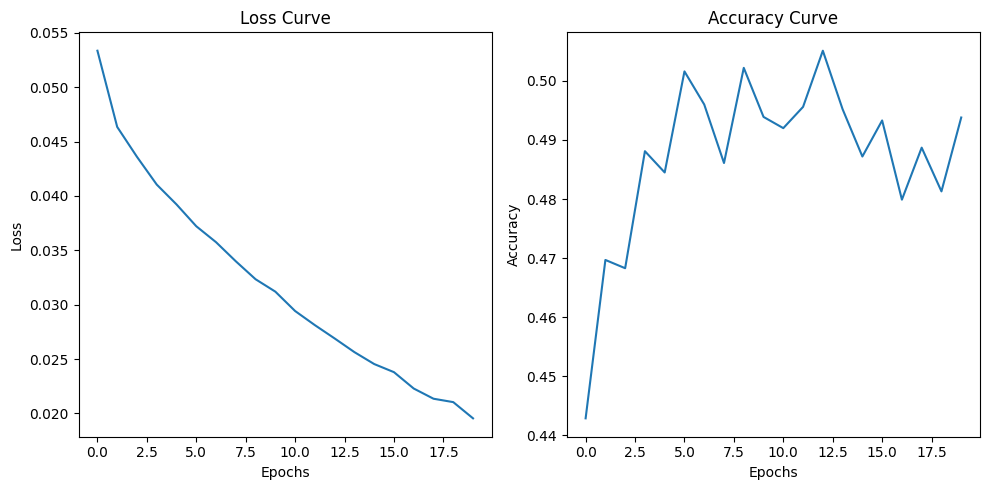

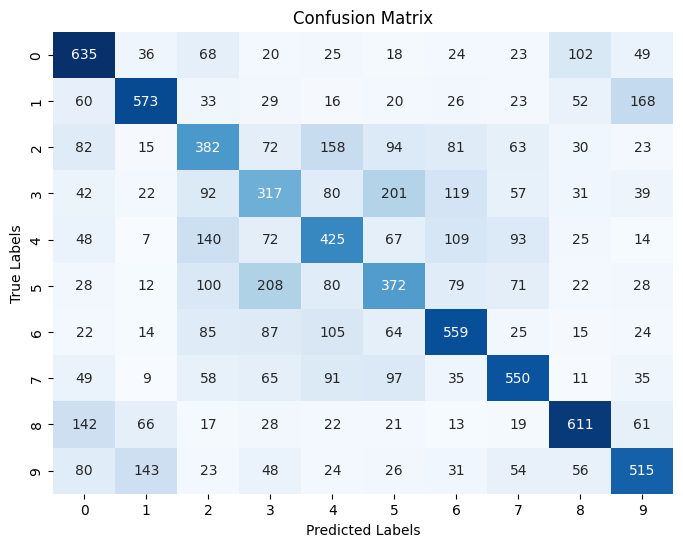

              precision    recall  f1-score   support

           0       0.53      0.64      0.58      1000
           1       0.64      0.57      0.60      1000
           2       0.38      0.38      0.38      1000
           3       0.34      0.32      0.33      1000
           4       0.41      0.42      0.42      1000
           5       0.38      0.37      0.38      1000
           6       0.52      0.56      0.54      1000
           7       0.56      0.55      0.56      1000
           8       0.64      0.61      0.63      1000
           9       0.54      0.52      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000

------- Important Metrics ------
Accuracy: 0.4939
F1: 0.49
Test time: 0.8864383697509766
Training time: 117.54686045646667
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Ac

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 20
lr_decay_fit = 0.99
momentum_fit = 0.98
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/20, Loss: 0.05738443513974089, Validation Accuracy: 0.3923
Epoch 2/20, Loss: 0.05321053116551615, Validation Accuracy: 0.3945
Epoch 3/20, Loss: 0.051661601298146446, Validation Accuracy: 0.4245
Epoch 4/20, Loss: 0.05019161832430661, Validation Accuracy: 0.4185
Epoch 5/20, Loss: 0.04887141473869919, Validation Accuracy: 0.4367
Epoch 6/20, Loss: 0.04745710942197608, Validation Accuracy: 0.4431
Epoch 7/20, Loss: 0.04632535300884011, Validation Accuracy: 0.439
Epoch 8/20, Loss: 0.04520233094099037, Validation Accuracy: 0.4564
Epoch 9/20, Loss: 0.044004258948730494, Validation Accuracy: 0.4386
Epoch 10/20, Loss: 0.04322744204812887, Validation Accuracy: 0.4612
Epoch 11/20, Loss: 0.04210572300113

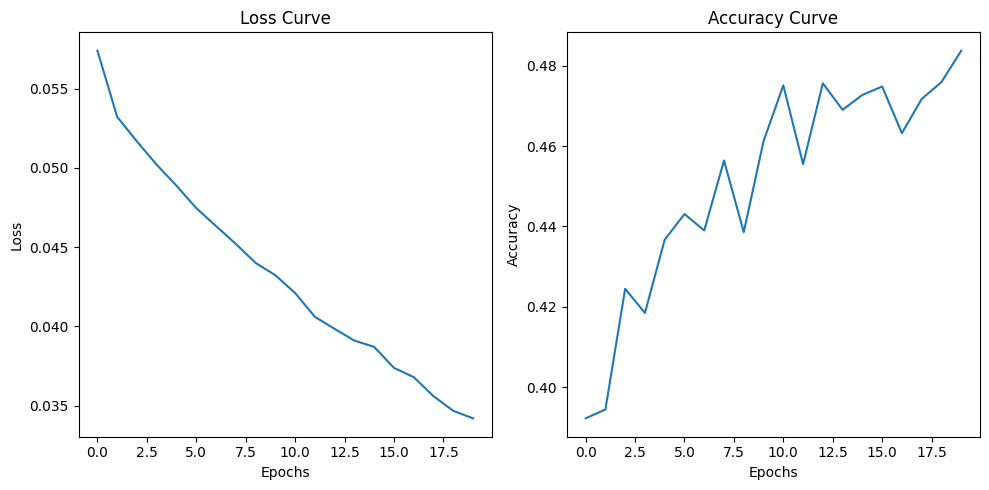

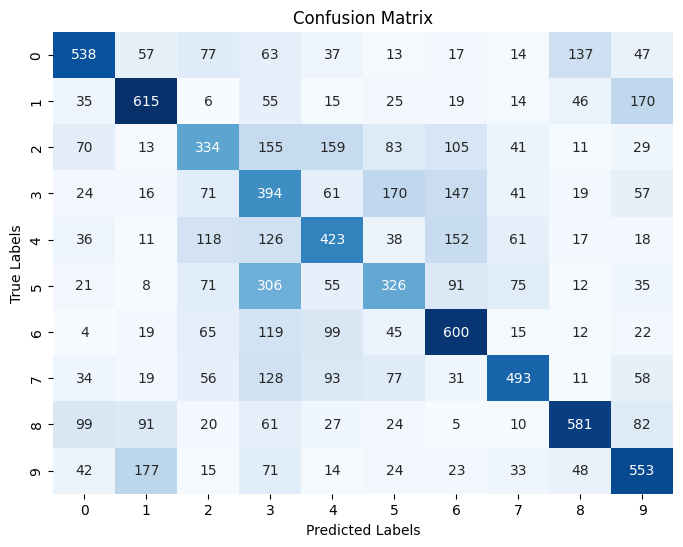

              precision    recall  f1-score   support

           0       0.60      0.54      0.57      1000
           1       0.60      0.61      0.61      1000
           2       0.40      0.33      0.36      1000
           3       0.27      0.39      0.32      1000
           4       0.43      0.42      0.43      1000
           5       0.40      0.33      0.36      1000
           6       0.50      0.60      0.55      1000
           7       0.62      0.49      0.55      1000
           8       0.65      0.58      0.61      1000
           9       0.52      0.55      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000

------- Important Metrics ------
Accuracy: 0.4857
F1: 0.49
Test time: 1.0537304878234863
Training time: 88.01882290840149
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 20
lr_decay_fit = 0.99
momentum_fit = 0.99
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Weight Decay

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.053303296467715915, Validation Accuracy: 0.445
Epoch 2/30, Loss: 0.04700053716998446, Validation Accuracy: 0.4645
Epoch 3/30, Loss: 0.04559890753063753, Validation Accuracy: 0.4806
Epoch 4/30, Loss: 0.04488053514295631, Validation Accuracy: 0.4842
Epoch 5/30, Loss: 0.04432124182470042, Validation Accuracy: 0.4804
Epoch 6/30, Loss: 0.04389714066816509, Validation Accuracy: 0.4961
Epoch 7/30, Loss: 0.04357418697885565, Validation Accuracy: 0.4953
Epoch 8/30, Loss: 0.04325975327388668, Validation Accuracy: 0.4942
Epoch 9/30, Loss: 0.042870473845453665, Validation Accuracy: 0.4975
Epoch 10/30, Loss: 0.04269119655003496, Validation Accuracy: 0.4995
Epoch 11/30, Loss: 0.04255173663257

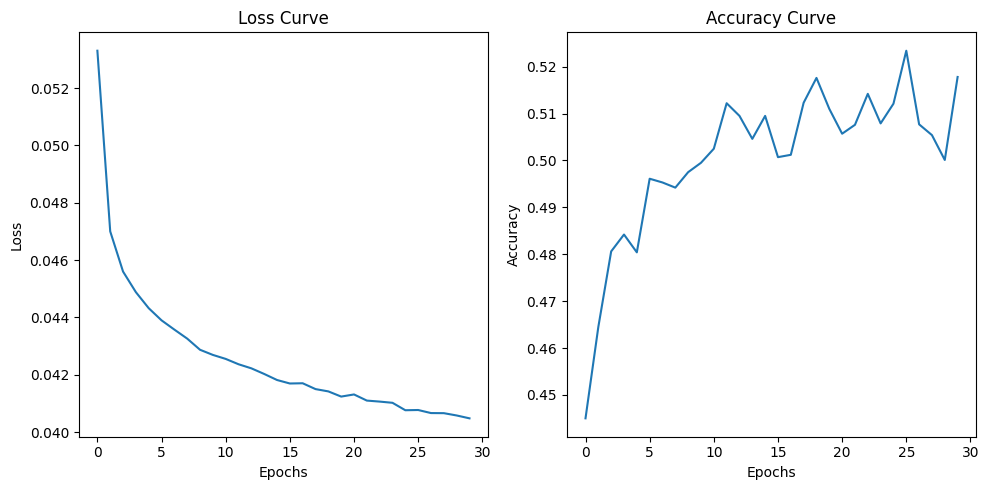

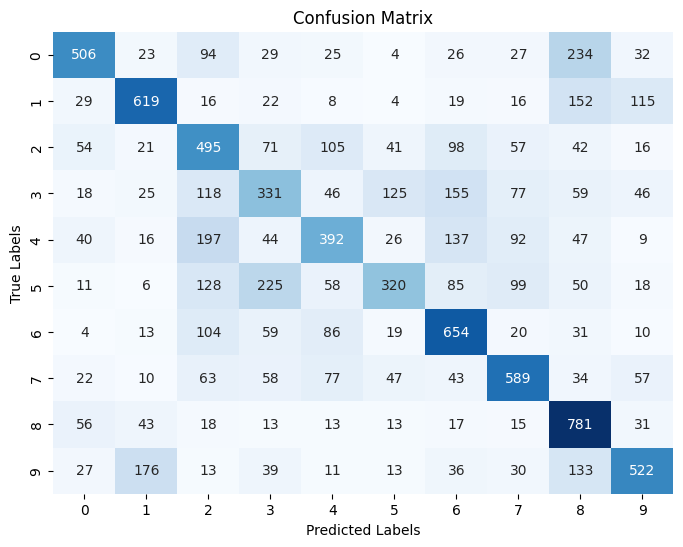

              precision    recall  f1-score   support

           0       0.66      0.51      0.57      1000
           1       0.65      0.62      0.63      1000
           2       0.40      0.49      0.44      1000
           3       0.37      0.33      0.35      1000
           4       0.48      0.39      0.43      1000
           5       0.52      0.32      0.40      1000
           6       0.51      0.65      0.58      1000
           7       0.58      0.59      0.58      1000
           8       0.50      0.78      0.61      1000
           9       0.61      0.52      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000

------- Important Metrics ------
Accuracy: 0.5209
F1: 0.52
Test time: 0.9595975875854492
Training time: 129.8129072189331
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0.2
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.053103750663544634, Validation Accuracy: 0.443
Epoch 2/30, Loss: 0.04598735465539099, Validation Accuracy: 0.4783
Epoch 3/30, Loss: 0.04363521112752169, Validation Accuracy: 0.4889
Epoch 4/30, Loss: 0.04226105744665523, Validation Accuracy: 0.5061
Epoch 5/30, Loss: 0.04144150119212217, Validation Accuracy: 0.5098
Epoch 6/30, Loss: 0.0407149165683837, Validation Accuracy: 0.5009
Epoch 7/30, Loss: 0.04024956693989594, Validation Accuracy: 0.5085
Epoch 8/30, Loss: 0.03966673883356226, Validation Accuracy: 0.5157
Epoch 9/30, Loss: 0.03929450776872252, Validation Accuracy: 0.5207
Epoch 10/30, Loss: 0.03885912449167649, Validation Accuracy: 0.5313
Epoch 11/30, Loss: 0.0385187327332057

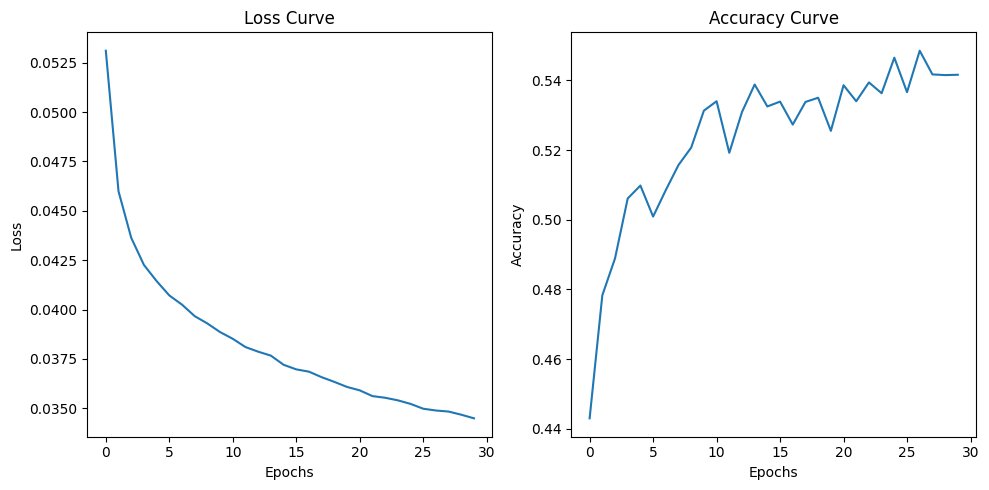

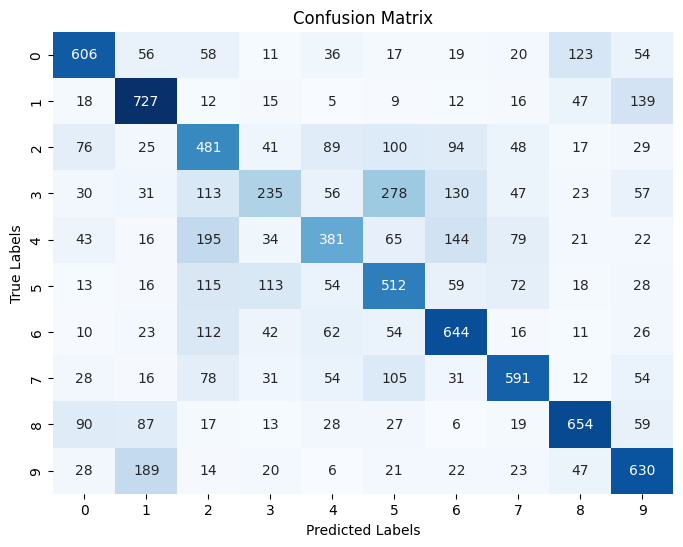

              precision    recall  f1-score   support

           0       0.64      0.61      0.62      1000
           1       0.61      0.73      0.67      1000
           2       0.40      0.48      0.44      1000
           3       0.42      0.23      0.30      1000
           4       0.49      0.38      0.43      1000
           5       0.43      0.51      0.47      1000
           6       0.55      0.64      0.60      1000
           7       0.63      0.59      0.61      1000
           8       0.67      0.65      0.66      1000
           9       0.57      0.63      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.54      0.55      0.54     10000
weighted avg       0.54      0.55      0.54     10000

------- Important Metrics ------
Accuracy: 0.5461
F1: 0.54
Test time: 0.8552937507629395
Training time: 127.5359480381012
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.05347429979970151, Validation Accuracy: 0.4504
Epoch 2/30, Loss: 0.04555569604912967, Validation Accuracy: 0.481
Epoch 3/30, Loss: 0.042239925689838906, Validation Accuracy: 0.4922
Epoch 4/30, Loss: 0.039614667284753456, Validation Accuracy: 0.4976
Epoch 5/30, Loss: 0.037401386491131755, Validation Accuracy: 0.5146
Epoch 6/30, Loss: 0.035638263640270416, Validation Accuracy: 0.5084
Epoch 7/30, Loss: 0.033911989280788486, Validation Accuracy: 0.5178
Epoch 8/30, Loss: 0.03233765204127281, Validation Accuracy: 0.5144
Epoch 9/30, Loss: 0.030808414639637755, Validation Accuracy: 0.5204
Epoch 10/30, Loss: 0.029621190925904456, Validation Accuracy: 0.514
Epoch 11/30, Loss: 0.0283122884

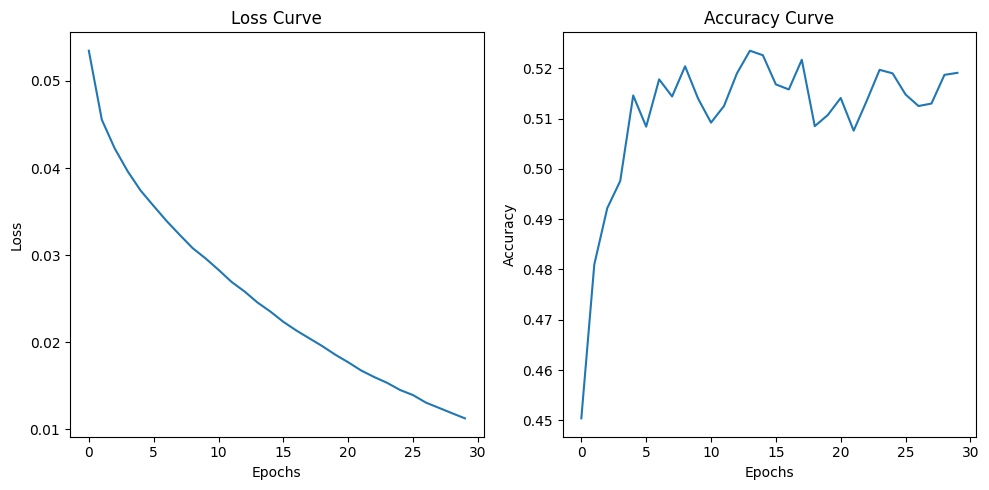

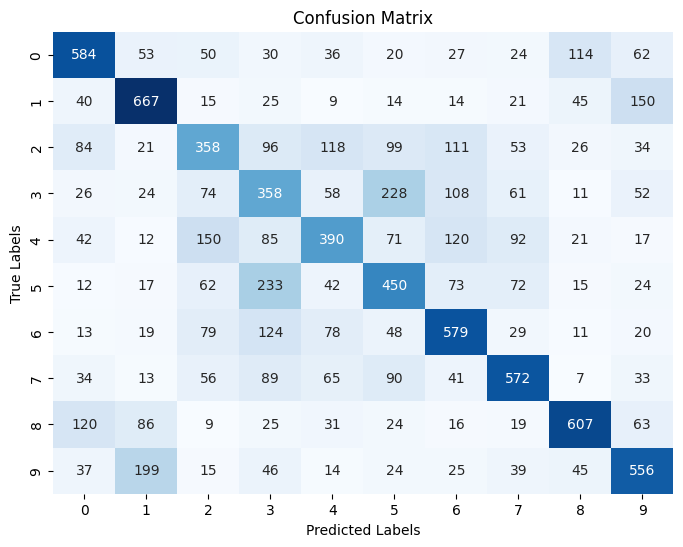

              precision    recall  f1-score   support

           0       0.59      0.58      0.59      1000
           1       0.60      0.67      0.63      1000
           2       0.41      0.36      0.38      1000
           3       0.32      0.36      0.34      1000
           4       0.46      0.39      0.42      1000
           5       0.42      0.45      0.44      1000
           6       0.52      0.58      0.55      1000
           7       0.58      0.57      0.58      1000
           8       0.67      0.61      0.64      1000
           9       0.55      0.56      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

------- Important Metrics ------
Accuracy: 0.5121
F1: 0.51
Test time: 0.921816349029541
Training time: 139.52086472511292
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0.01
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.053814232104727515, Validation Accuracy: 0.4468
Epoch 2/30, Loss: 0.04565187658103068, Validation Accuracy: 0.4782
Epoch 3/30, Loss: 0.04224255529643832, Validation Accuracy: 0.4863
Epoch 4/30, Loss: 0.039411996285333574, Validation Accuracy: 0.5012
Epoch 5/30, Loss: 0.03717090312595551, Validation Accuracy: 0.5043
Epoch 6/30, Loss: 0.035113277878660795, Validation Accuracy: 0.5015
Epoch 7/30, Loss: 0.03318841344711604, Validation Accuracy: 0.5014
Epoch 8/30, Loss: 0.03139796688428198, Validation Accuracy: 0.5196
Epoch 9/30, Loss: 0.02983448899240496, Validation Accuracy: 0.5085
Epoch 10/30, Loss: 0.028186508797458237, Validation Accuracy: 0.5093
Epoch 11/30, Loss: 0.02673476329

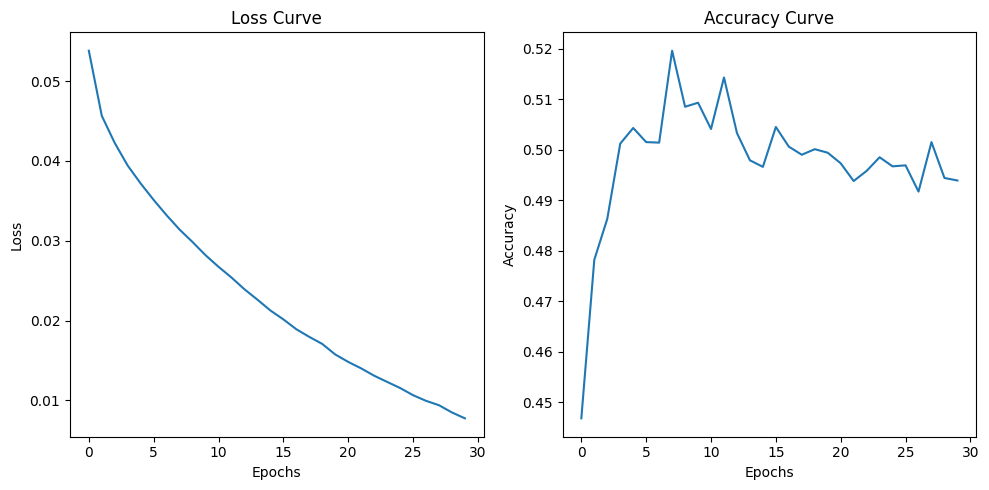

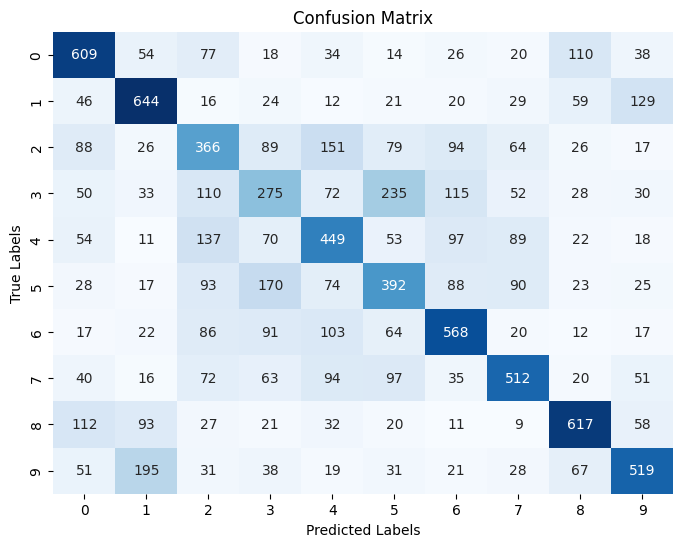

              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1000
           1       0.58      0.64      0.61      1000
           2       0.36      0.37      0.36      1000
           3       0.32      0.28      0.30      1000
           4       0.43      0.45      0.44      1000
           5       0.39      0.39      0.39      1000
           6       0.53      0.57      0.55      1000
           7       0.56      0.51      0.54      1000
           8       0.63      0.62      0.62      1000
           9       0.58      0.52      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.49      0.50      0.49     10000
weighted avg       0.49      0.50      0.49     10000

------- Important Metrics ------
Accuracy: 0.4951
F1: 0.49
Test time: 0.8744840621948242
Training time: 138.3893802165985
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0.001
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.05327754655452575, Validation Accuracy: 0.4418
Epoch 2/30, Loss: 0.045375020361186194, Validation Accuracy: 0.4724
Epoch 3/30, Loss: 0.041840296444198205, Validation Accuracy: 0.4901
Epoch 4/30, Loss: 0.039165890139772765, Validation Accuracy: 0.5016
Epoch 5/30, Loss: 0.036965303955114985, Validation Accuracy: 0.5112
Epoch 6/30, Loss: 0.034873066136685636, Validation Accuracy: 0.5161
Epoch 7/30, Loss: 0.032963981936919295, Validation Accuracy: 0.5169
Epoch 8/30, Loss: 0.03128680071290016, Validation Accuracy: 0.5134
Epoch 9/30, Loss: 0.02949365306743112, Validation Accuracy: 0.5102
Epoch 10/30, Loss: 0.028072160523145904, Validation Accuracy: 0.5099
Epoch 11/30, Loss: 0.02643557

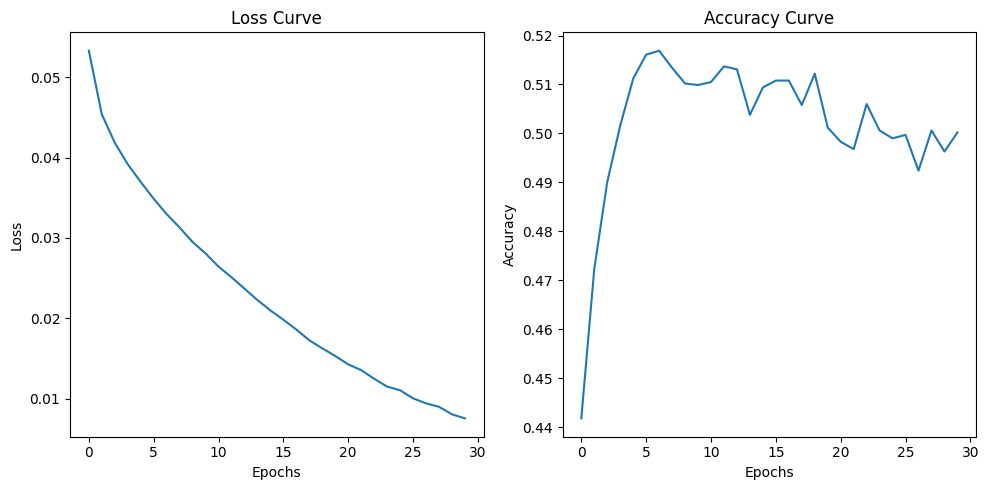

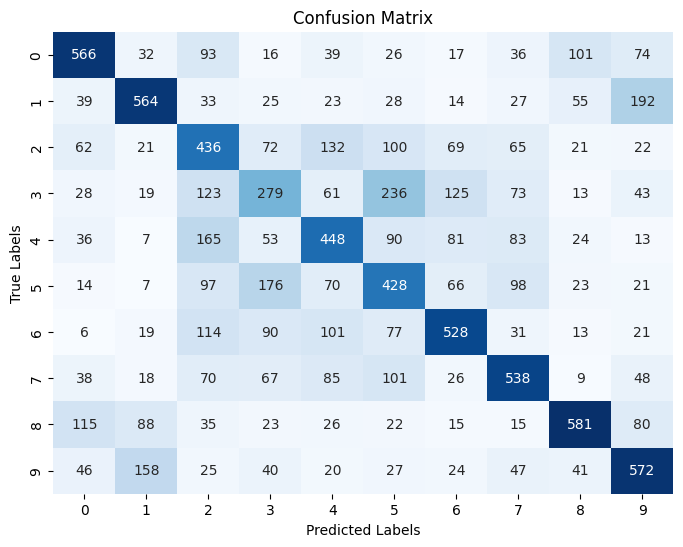

              precision    recall  f1-score   support

           0       0.60      0.57      0.58      1000
           1       0.60      0.56      0.58      1000
           2       0.37      0.44      0.40      1000
           3       0.33      0.28      0.30      1000
           4       0.45      0.45      0.45      1000
           5       0.38      0.43      0.40      1000
           6       0.55      0.53      0.54      1000
           7       0.53      0.54      0.53      1000
           8       0.66      0.58      0.62      1000
           9       0.53      0.57      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.50     10000
weighted avg       0.50      0.49      0.50     10000

------- Important Metrics ------
Accuracy: 0.494
F1: 0.5
Test time: 0.9374117851257324
Training time: 158.45680785179138
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Acti

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

# Comparison Experiment

## Activiation Function

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: gelu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: gelu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.05271829855652033, Validation Accuracy: 0.4507
Epoch 2/30, Loss: 0.04635332388119122, Validation Accuracy: 0.4706
Epoch 3/30, Loss: 0.0447672220705628, Validation Accuracy: 0.4723
Epoch 4/30, Loss: 0.04420767722196091, Validation Accuracy: 0.4811
Epoch 5/30, Loss: 0.04380960608067916, Validation Accuracy: 0.483
Epoch 6/30, Loss: 0.04355112191711984, Validation Accuracy: 0.4952
Epoch 7/30, Loss: 0.04339466434637344, Validation Accuracy: 0.4891
Epoch 8/30, Loss: 0.04316091282422254, Validation Accuracy: 0.4991
Epoch 9/30, Loss: 0.04297195726490963, Validation Accuracy: 0.4897
Epoch 10/30, Loss: 0.04292171610435377, Validation Accuracy: 0.4957
Epoch 11/30, Loss: 0.04268190366259289

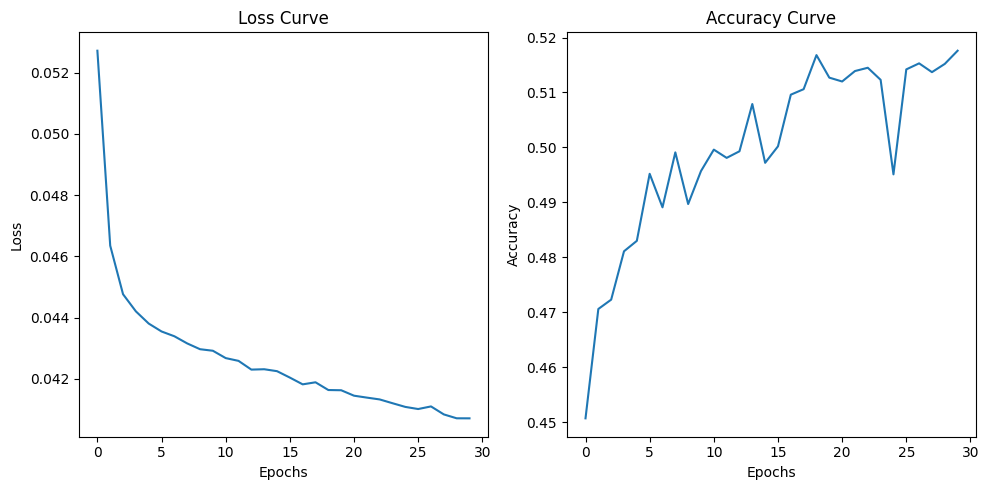

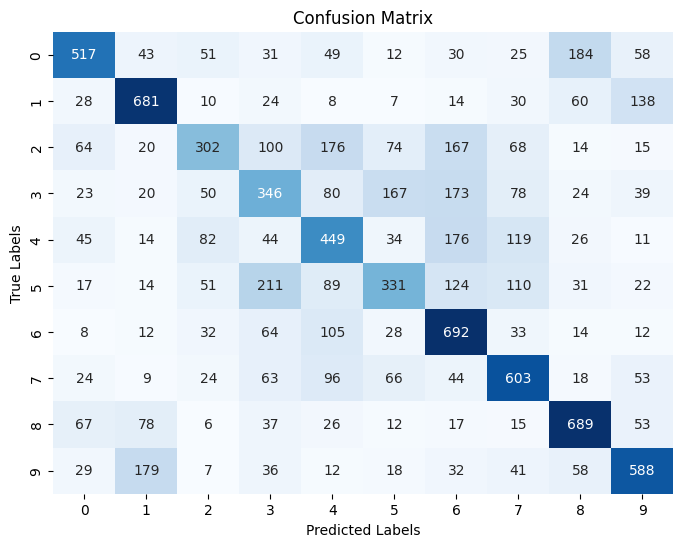

              precision    recall  f1-score   support

           0       0.63      0.52      0.57      1000
           1       0.64      0.68      0.66      1000
           2       0.49      0.30      0.37      1000
           3       0.36      0.35      0.35      1000
           4       0.41      0.45      0.43      1000
           5       0.44      0.33      0.38      1000
           6       0.47      0.69      0.56      1000
           7       0.54      0.60      0.57      1000
           8       0.62      0.69      0.65      1000
           9       0.59      0.59      0.59      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000

------- Important Metrics ------
Accuracy: 0.5198
F1: 0.51
Test time: 1.8544776439666748
Training time: 308.7800793647766
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'gelu', "gelu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.05311525427002972, Validation Accuracy: 0.4402
Epoch 2/30, Loss: 0.04607300035408493, Validation Accuracy: 0.4776
Epoch 3/30, Loss: 0.04369395955064262, Validation Accuracy: 0.4936
Epoch 4/30, Loss: 0.04231056592077514, Validation Accuracy: 0.5006
Epoch 5/30, Loss: 0.041422426366669186, Validation Accuracy: 0.5041
Epoch 6/30, Loss: 0.040791279324649675, Validation Accuracy: 0.5093
Epoch 7/30, Loss: 0.04017680147210336, Validation Accuracy: 0.5208
Epoch 8/30, Loss: 0.03972824379916327, Validation Accuracy: 0.5172
Epoch 9/30, Loss: 0.039260425612537765, Validation Accuracy: 0.5224
Epoch 10/30, Loss: 0.038818884698207864, Validation Accuracy: 0.532
Epoch 11/30, Loss: 0.

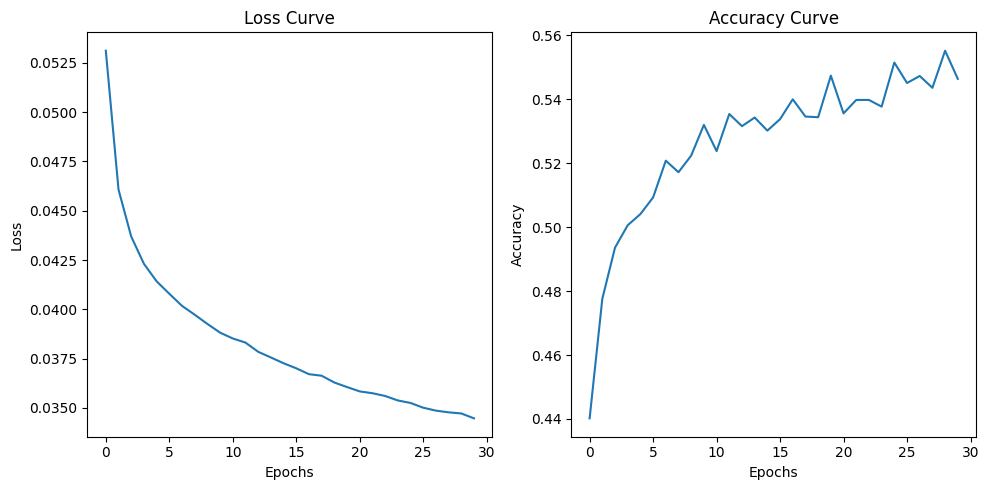

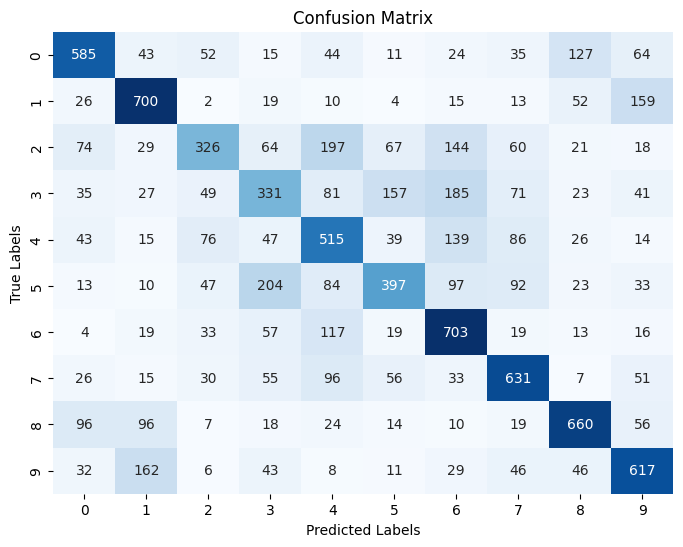

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1000
           1       0.63      0.70      0.66      1000
           2       0.52      0.33      0.40      1000
           3       0.39      0.33      0.36      1000
           4       0.44      0.52      0.47      1000
           5       0.51      0.40      0.45      1000
           6       0.51      0.70      0.59      1000
           7       0.59      0.63      0.61      1000
           8       0.66      0.66      0.66      1000
           9       0.58      0.62      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.54      0.55      0.54     10000
weighted avg       0.54      0.55      0.54     10000

------- Important Metrics ------
Accuracy: 0.5465
F1: 0.54
Test time: 2.7120189666748047
Training time: 172.37257027626038
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Ac

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'leaky_relu', "leaky_relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.05314299858141549, Validation Accuracy: 0.4483
Epoch 2/30, Loss: 0.045975251611046174, Validation Accuracy: 0.4881
Epoch 3/30, Loss: 0.04369142113678646, Validation Accuracy: 0.4943
Epoch 4/30, Loss: 0.04225592271730586, Validation Accuracy: 0.4953
Epoch 5/30, Loss: 0.041480423702970115, Validation Accuracy: 0.5084
Epoch 6/30, Loss: 0.040702595291483866, Validation Accuracy: 0.519
Epoch 7/30, Loss: 0.04027764827001009, Validation Accuracy: 0.5057
Epoch 8/30, Loss: 0.039792005193181774, Validation Accuracy: 0.5111
Epoch 9/30, Loss: 0.03922985446147027, Validation Accuracy: 0.5147
Epoch 10/30, Loss: 0.038888843306545434, Validation Accuracy: 0.5201
Epoch 11/30, Loss: 0.03854471654

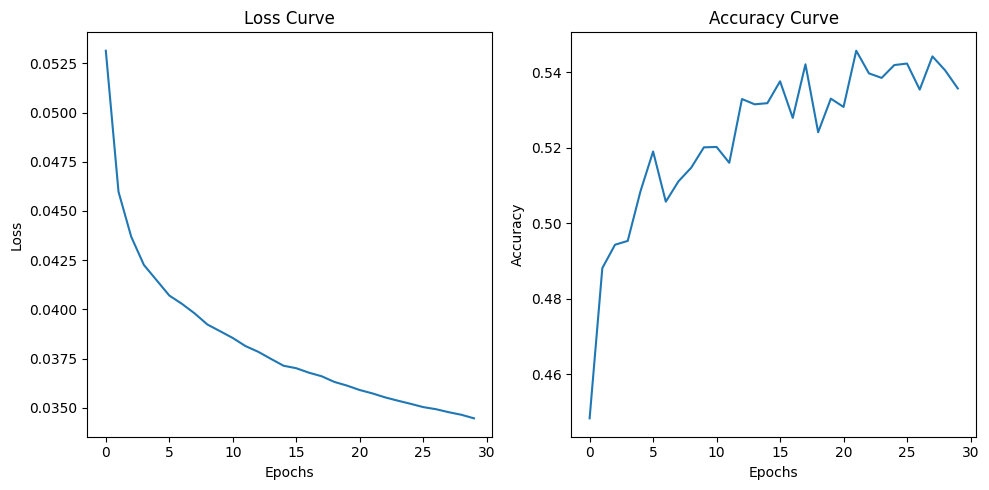

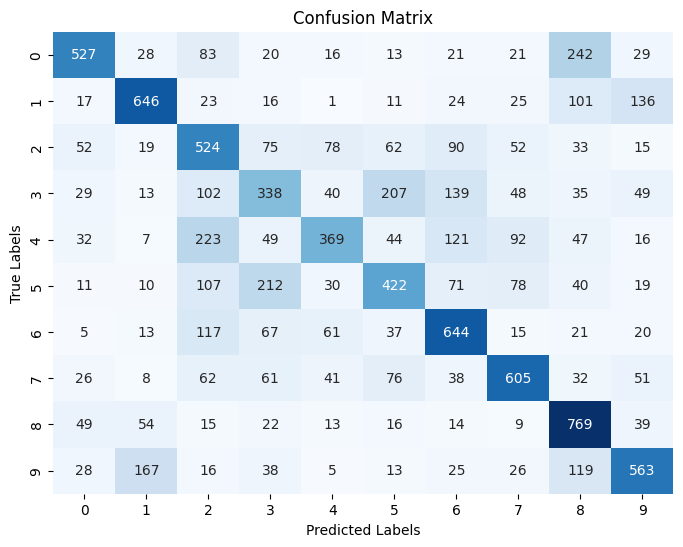

              precision    recall  f1-score   support

           0       0.68      0.53      0.59      1000
           1       0.67      0.65      0.66      1000
           2       0.41      0.52      0.46      1000
           3       0.38      0.34      0.36      1000
           4       0.56      0.37      0.45      1000
           5       0.47      0.42      0.44      1000
           6       0.54      0.64      0.59      1000
           7       0.62      0.60      0.61      1000
           8       0.53      0.77      0.63      1000
           9       0.60      0.56      0.58      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.54     10000
weighted avg       0.55      0.54      0.54     10000

------- Important Metrics ------
Accuracy: 0.5407
F1: 0.54
Test time: 1.1121852397918701
Training time: 120.32492303848267
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Ac

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'relu', "relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: tanh
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: tanh
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.05632372679823509, Validation Accuracy: 0.4047
Epoch 2/30, Loss: 0.051957736442498695, Validation Accuracy: 0.4155
Epoch 3/30, Loss: 0.05004184458146773, Validation Accuracy: 0.4411
Epoch 4/30, Loss: 0.048369453262334244, Validation Accuracy: 0.4539
Epoch 5/30, Loss: 0.046989388188037856, Validation Accuracy: 0.4591
Epoch 6/30, Loss: 0.046059203056371914, Validation Accuracy: 0.4663
Epoch 7/30, Loss: 0.04528252093340485, Validation Accuracy: 0.4636
Epoch 8/30, Loss: 0.044705838915036336, Validation Accuracy: 0.4781
Epoch 9/30, Loss: 0.044183227352841206, Validation Accuracy: 0.4844
Epoch 10/30, Loss: 0.0437245294598587, Validation Accuracy: 0.4767
Epoch 11/30, Loss: 0.0434018885

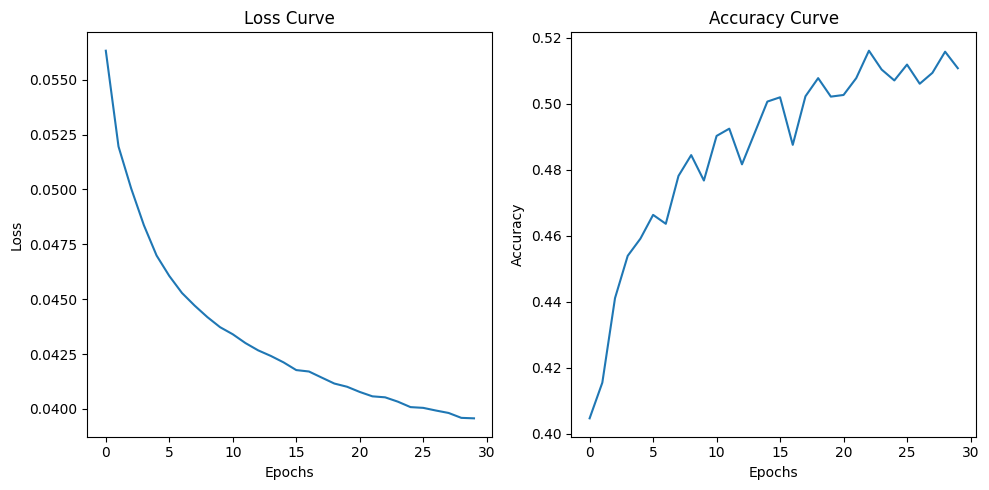

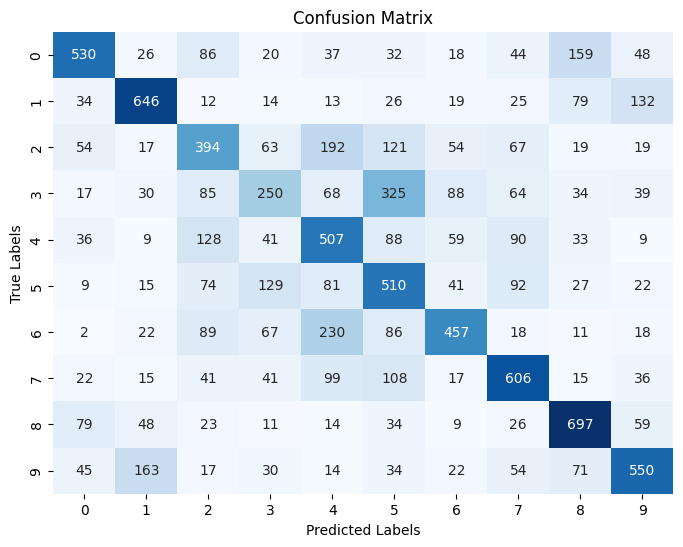

              precision    recall  f1-score   support

           0       0.64      0.53      0.58      1000
           1       0.65      0.65      0.65      1000
           2       0.42      0.39      0.40      1000
           3       0.38      0.25      0.30      1000
           4       0.40      0.51      0.45      1000
           5       0.37      0.51      0.43      1000
           6       0.58      0.46      0.51      1000
           7       0.56      0.61      0.58      1000
           8       0.61      0.70      0.65      1000
           9       0.59      0.55      0.57      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000

------- Important Metrics ------
Accuracy: 0.5147
F1: 0.51
Test time: 0.8905704021453857
Training time: 194.5146906375885
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'tanh', "tanh",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33536 Dropout rate: 0, Batchnorm: True, Activation function: logistic
Params of HiddenLayer: 66304 Dropout rate: 0, Batchnorm: True, Activation function: logistic
Params of HiddenLayer: 2590 Dropout rate: 0, Batchnorm: True, Activation function: softmax
Total params: 102430
Epoch 1/30, Loss: 0.0646374554136341, Validation Accuracy: 0.3319
Epoch 2/30, Loss: 0.05925108032915948, Validation Accuracy: 0.3306
Epoch 3/30, Loss: 0.05765978272602722, Validation Accuracy: 0.3627
Epoch 4/30, Loss: 0.0567445019508889, Validation Accuracy: 0.3721
Epoch 5/30, Loss: 0.055852606608786354, Validation Accuracy: 0.3698
Epoch 6/30, Loss: 0.055251982711703805, Validation Accuracy: 0.381
Epoch 7/30, Loss: 0.05481406010144275, Validation Accuracy: 0.3798
Epoch 8/30, Loss: 0.054423872808587535, Validation Accuracy: 0.3856
Epoch 9/30, Loss: 0.05408872990121179, Validation Accuracy: 0.3854
Epoch 10/30, Loss: 0.05379640573335061, Validation Accuracy: 0.3946
Epoch 11/30, Loss: 0.0534141858

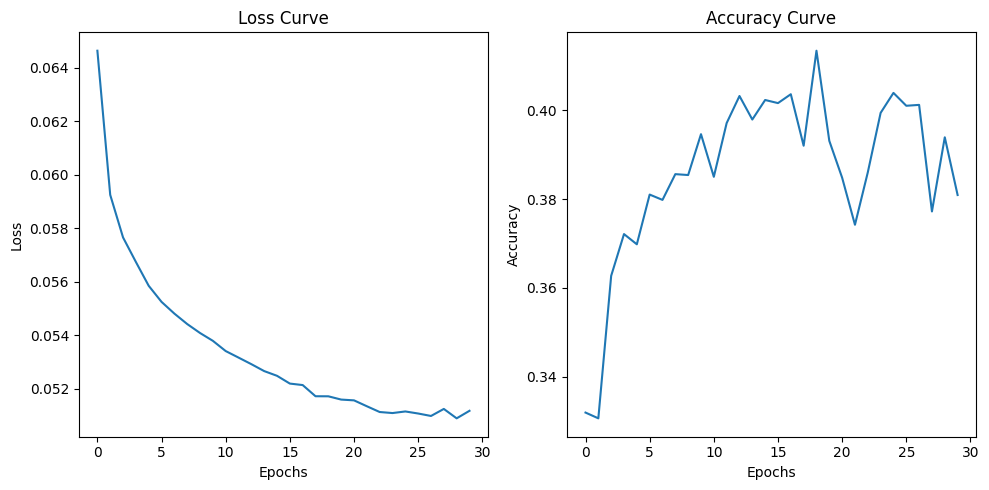

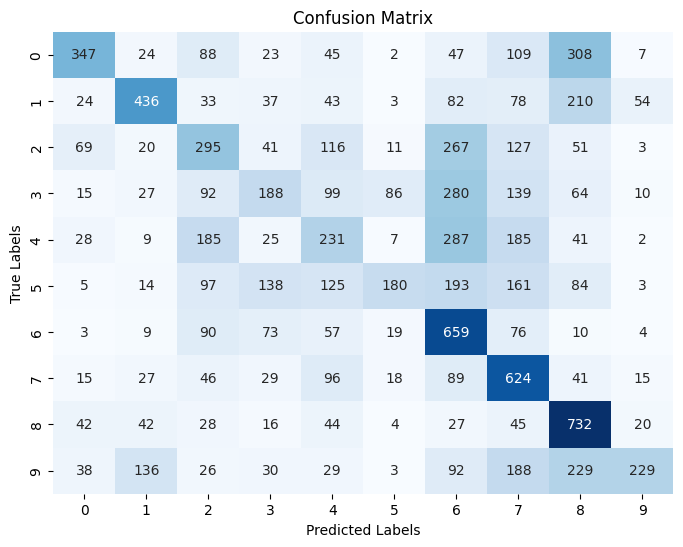

              precision    recall  f1-score   support

           0       0.59      0.35      0.44      1000
           1       0.59      0.44      0.50      1000
           2       0.30      0.29      0.30      1000
           3       0.31      0.19      0.23      1000
           4       0.26      0.23      0.25      1000
           5       0.54      0.18      0.27      1000
           6       0.33      0.66      0.44      1000
           7       0.36      0.62      0.46      1000
           8       0.41      0.73      0.53      1000
           9       0.66      0.23      0.34      1000

    accuracy                           0.39     10000
   macro avg       0.44      0.39      0.37     10000
weighted avg       0.44      0.39      0.37     10000

------- Important Metrics ------
Accuracy: 0.3921
F1: 0.37
Test time: 5.165935754776001
Training time: 385.69260263442993
Params count: 102430
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'logistic', "logistic",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = True
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

# Ablation Experiment

## Batch Normalization

Params of HiddenLayer: 33536 Dropout rate: 0, Batchnorm: True, Activation function: leaky_relu
Params of HiddenLayer: 66304 Dropout rate: 0, Batchnorm: True, Activation function: leaky_relu
Params of HiddenLayer: 2590 Dropout rate: 0, Batchnorm: True, Activation function: softmax
Total params: 102430
Epoch 1/20, Loss: 0.05648848748544012, Validation Accuracy: 0.3817
Epoch 2/20, Loss: 0.05457368323926345, Validation Accuracy: 0.3868
Epoch 3/20, Loss: 0.054280289701224886, Validation Accuracy: 0.3663
Epoch 4/20, Loss: 0.05495302069442053, Validation Accuracy: 0.3524
Epoch 5/20, Loss: 0.05500395274992312, Validation Accuracy: 0.367
Epoch 6/20, Loss: 0.05493735671381273, Validation Accuracy: 0.3742
Epoch 7/20, Loss: 0.05491979418135239, Validation Accuracy: 0.3711
Epoch 8/20, Loss: 0.05487450694396293, Validation Accuracy: 0.3716
Epoch 9/20, Loss: 0.0547882194753783, Validation Accuracy: 0.35
Epoch 10/20, Loss: 0.05488576866927305, Validation Accuracy: 0.3809
Epoch 11/20, Loss: 0.054731757

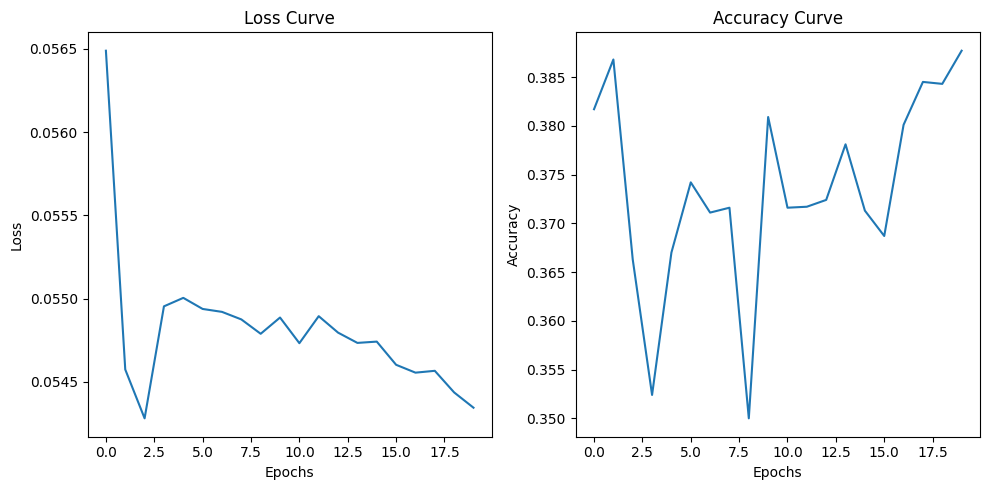

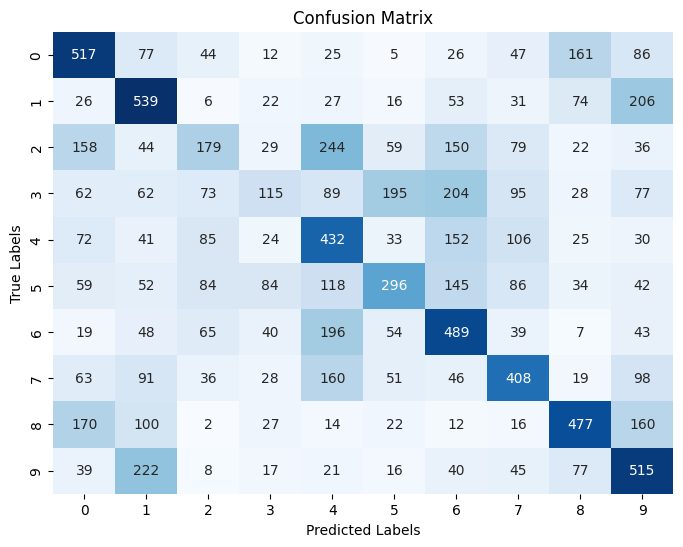

              precision    recall  f1-score   support

           0       0.44      0.52      0.47      1000
           1       0.42      0.54      0.47      1000
           2       0.31      0.18      0.23      1000
           3       0.29      0.12      0.16      1000
           4       0.33      0.43      0.37      1000
           5       0.40      0.30      0.34      1000
           6       0.37      0.49      0.42      1000
           7       0.43      0.41      0.42      1000
           8       0.52      0.48      0.50      1000
           9       0.40      0.52      0.45      1000

    accuracy                           0.40     10000
   macro avg       0.39      0.40      0.38     10000
weighted avg       0.39      0.40      0.38     10000

------- Important Metrics ------
Accuracy: 0.3967
F1: 0.38
Test time: 7.1762895584106445
Training time: 242.3984498977661
Params count: 102430
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'leaky_relu', "leaky_relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 20
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = True
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

## Dropout

Params of HiddenLayer: 33024 Dropout rate: 0.1, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 65792 Dropout rate: 0.1, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 2570 Dropout rate: 0.1, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/20, Loss: 0.05697187605189126, Validation Accuracy: 0.4058
Epoch 2/20, Loss: 0.05113650178247723, Validation Accuracy: 0.4319
Epoch 3/20, Loss: 0.049144563128671714, Validation Accuracy: 0.4438
Epoch 4/20, Loss: 0.04776653797547362, Validation Accuracy: 0.4496
Epoch 5/20, Loss: 0.04697273626551769, Validation Accuracy: 0.4551
Epoch 6/20, Loss: 0.04632504114086789, Validation Accuracy: 0.4679
Epoch 7/20, Loss: 0.04593266703516339, Validation Accuracy: 0.4687
Epoch 8/20, Loss: 0.04542908058245083, Validation Accuracy: 0.4749
Epoch 9/20, Loss: 0.04513627215322673, Validation Accuracy: 0.4717
Epoch 10/20, Loss: 0.04478861411172963, Validation Accuracy: 0.468
Epoch 11/20, Loss:

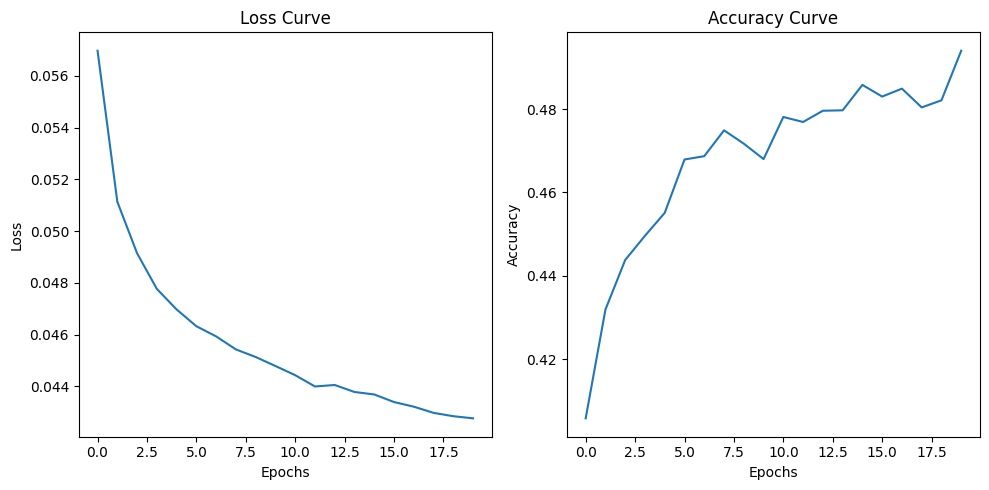

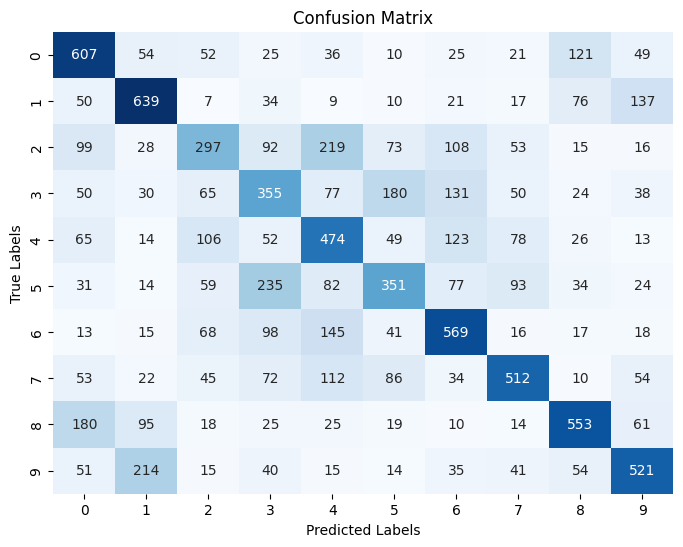

              precision    recall  f1-score   support

           0       0.51      0.61      0.55      1000
           1       0.57      0.64      0.60      1000
           2       0.41      0.30      0.34      1000
           3       0.35      0.35      0.35      1000
           4       0.40      0.47      0.43      1000
           5       0.42      0.35      0.38      1000
           6       0.50      0.57      0.53      1000
           7       0.57      0.51      0.54      1000
           8       0.59      0.55      0.57      1000
           9       0.56      0.52      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000

------- Important Metrics ------
Accuracy: 0.4878
F1: 0.48
Test time: 1.6312367916107178
Training time: 127.3691635131836
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'leaky_relu', "leaky_relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 20
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0.1
batch_norm = False
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0.05, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 65792 Dropout rate: 0.05, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 2570 Dropout rate: 0.05, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.055245190787589056, Validation Accuracy: 0.4249
Epoch 2/30, Loss: 0.048731685388768195, Validation Accuracy: 0.4497
Epoch 3/30, Loss: 0.04636134379722537, Validation Accuracy: 0.4584
Epoch 4/30, Loss: 0.045280020407766665, Validation Accuracy: 0.4567
Epoch 5/30, Loss: 0.044513757320323845, Validation Accuracy: 0.4856
Epoch 6/30, Loss: 0.04380277807247874, Validation Accuracy: 0.483
Epoch 7/30, Loss: 0.04322374312893047, Validation Accuracy: 0.4753
Epoch 8/30, Loss: 0.04297046806246496, Validation Accuracy: 0.4925
Epoch 9/30, Loss: 0.042440031174404376, Validation Accuracy: 0.4941
Epoch 10/30, Loss: 0.0421037580236799, Validation Accuracy: 0.5035
Epoch 11/30,

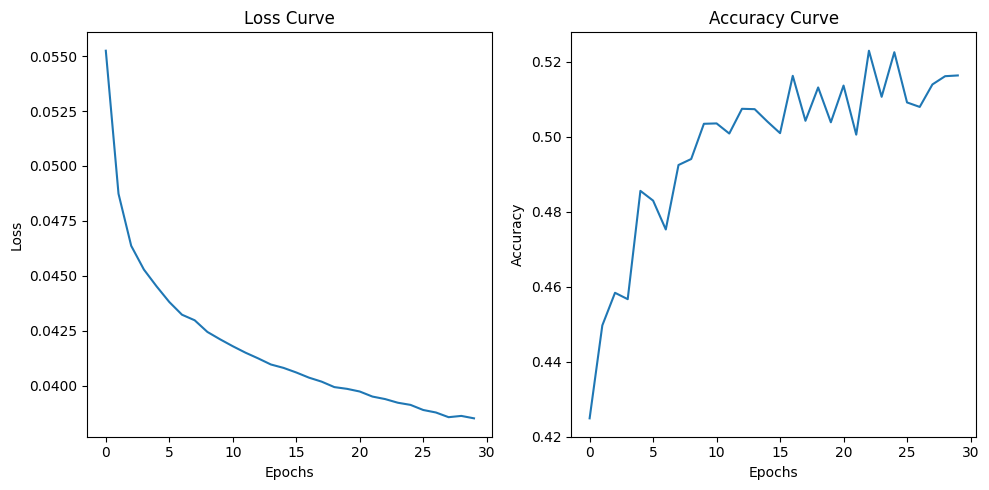

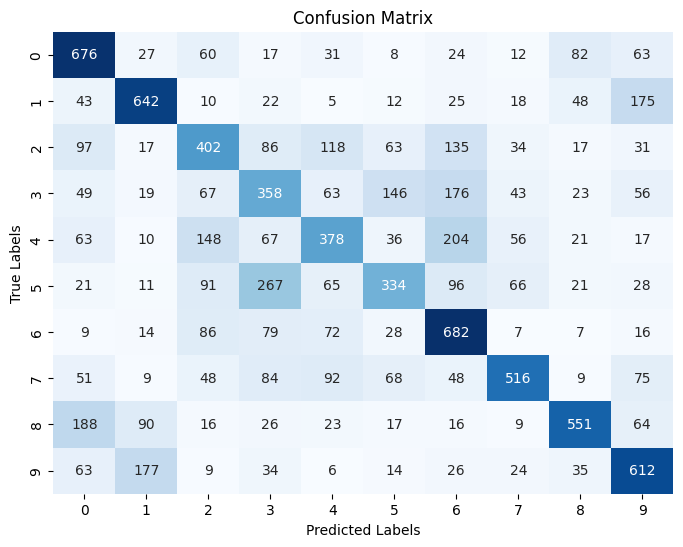

              precision    recall  f1-score   support

           0       0.54      0.68      0.60      1000
           1       0.63      0.64      0.64      1000
           2       0.43      0.40      0.42      1000
           3       0.34      0.36      0.35      1000
           4       0.44      0.38      0.41      1000
           5       0.46      0.33      0.39      1000
           6       0.48      0.68      0.56      1000
           7       0.66      0.52      0.58      1000
           8       0.68      0.55      0.61      1000
           9       0.54      0.61      0.57      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000

------- Important Metrics ------
Accuracy: 0.5151
F1: 0.51
Test time: 1.6170201301574707
Training time: 199.55531191825867
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Ac

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'leaky_relu', "leaky_relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0.05
batch_norm = False
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0.01, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 65792 Dropout rate: 0.01, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 2570 Dropout rate: 0.01, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.05364291176996785, Validation Accuracy: 0.4452
Epoch 2/30, Loss: 0.04666014693904595, Validation Accuracy: 0.4746
Epoch 3/30, Loss: 0.04432044936654642, Validation Accuracy: 0.4852
Epoch 4/30, Loss: 0.04301855973817171, Validation Accuracy: 0.4989
Epoch 5/30, Loss: 0.0422116643542758, Validation Accuracy: 0.4963
Epoch 6/30, Loss: 0.041431724097707116, Validation Accuracy: 0.5029
Epoch 7/30, Loss: 0.04100396319955789, Validation Accuracy: 0.4966
Epoch 8/30, Loss: 0.040492221244944136, Validation Accuracy: 0.5101
Epoch 9/30, Loss: 0.03998716334302601, Validation Accuracy: 0.5139
Epoch 10/30, Loss: 0.03981959754123036, Validation Accuracy: 0.5166
Epoch 11/30, L

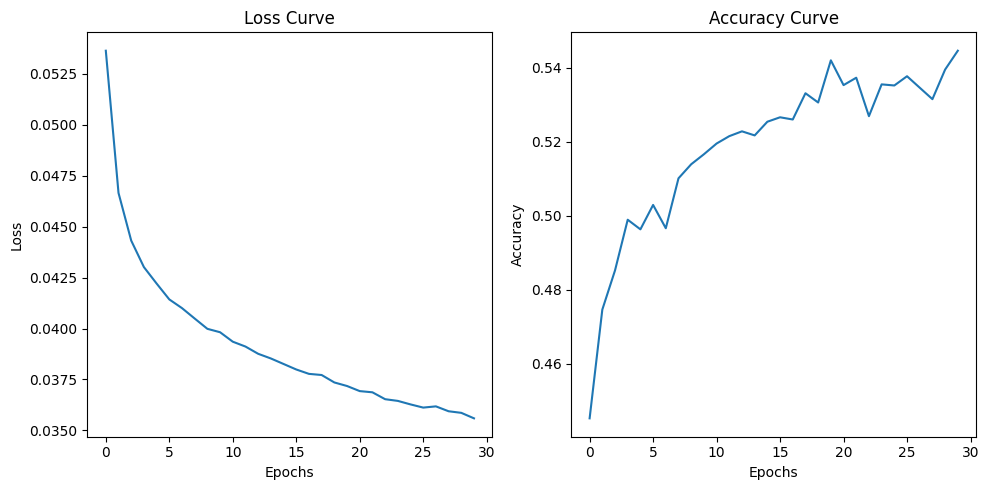

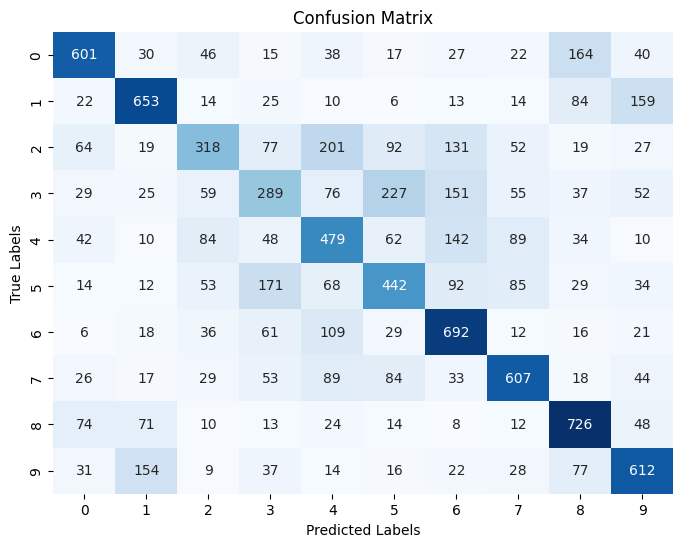

              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1000
           1       0.65      0.65      0.65      1000
           2       0.48      0.32      0.38      1000
           3       0.37      0.29      0.32      1000
           4       0.43      0.48      0.45      1000
           5       0.45      0.44      0.44      1000
           6       0.53      0.69      0.60      1000
           7       0.62      0.61      0.61      1000
           8       0.60      0.73      0.66      1000
           9       0.58      0.61      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000

------- Important Metrics ------
Accuracy: 0.5419
F1: 0.54
Test time: 1.6380751132965088
Training time: 190.6858901977539
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'leaky_relu', "leaky_relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0.01
batch_norm = False
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.05293841108896887, Validation Accuracy: 0.453
Epoch 2/30, Loss: 0.0458072363060288, Validation Accuracy: 0.4797
Epoch 3/30, Loss: 0.04353292449839478, Validation Accuracy: 0.4818
Epoch 4/30, Loss: 0.042332265700465777, Validation Accuracy: 0.5047
Epoch 5/30, Loss: 0.041401496586378726, Validation Accuracy: 0.5065
Epoch 6/30, Loss: 0.04069848654224832, Validation Accuracy: 0.5146
Epoch 7/30, Loss: 0.04018486113092622, Validation Accuracy: 0.5088
Epoch 8/30, Loss: 0.039772038705399845, Validation Accuracy: 0.5236
Epoch 9/30, Loss: 0.03930341338026014, Validation Accuracy: 0.5279
Epoch 10/30, Loss: 0.03889417801009134, Validation Accuracy: 0.5234
Epoch 11/30, Loss: 0.03

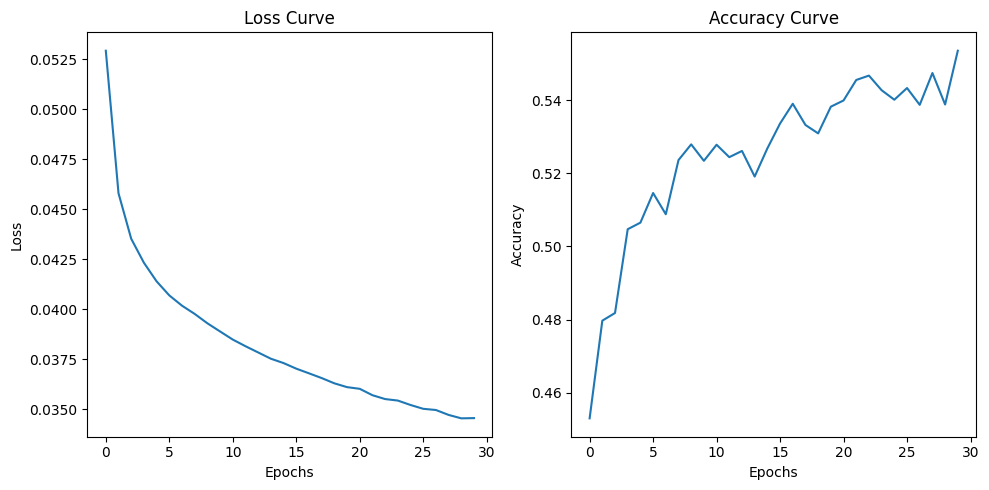

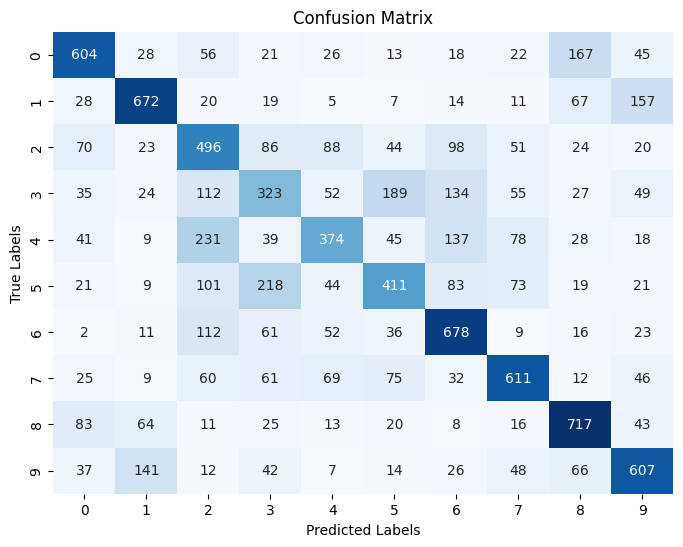

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      1000
           1       0.68      0.67      0.68      1000
           2       0.41      0.50      0.45      1000
           3       0.36      0.32      0.34      1000
           4       0.51      0.37      0.43      1000
           5       0.48      0.41      0.44      1000
           6       0.55      0.68      0.61      1000
           7       0.63      0.61      0.62      1000
           8       0.63      0.72      0.67      1000
           9       0.59      0.61      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000

------- Important Metrics ------
Accuracy: 0.5493
F1: 0.55
Test time: 1.979222059249878
Training time: 140.33120608329773
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'leaky_relu', "leaky_relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)

# Best Model

Params of HiddenLayer: 33024 Dropout rate: 0, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 65792 Dropout rate: 0, Batchnorm: False, Activation function: leaky_relu
Params of HiddenLayer: 2570 Dropout rate: 0, Batchnorm: False, Activation function: softmax
Total params: 101386
Epoch 1/30, Loss: 0.05293841108896887, Validation Accuracy: 0.453
Epoch 2/30, Loss: 0.0458072363060288, Validation Accuracy: 0.4797
Epoch 3/30, Loss: 0.04353292449839478, Validation Accuracy: 0.4818
Epoch 4/30, Loss: 0.042332265700465777, Validation Accuracy: 0.5047
Epoch 5/30, Loss: 0.041401496586378726, Validation Accuracy: 0.5065
Epoch 6/30, Loss: 0.04069848654224832, Validation Accuracy: 0.5146
Epoch 7/30, Loss: 0.04018486113092622, Validation Accuracy: 0.5088
Epoch 8/30, Loss: 0.039772038705399845, Validation Accuracy: 0.5236
Epoch 9/30, Loss: 0.03930341338026014, Validation Accuracy: 0.5279
Epoch 10/30, Loss: 0.03889417801009134, Validation Accuracy: 0.5234
Epoch 11/30, Loss: 0.03

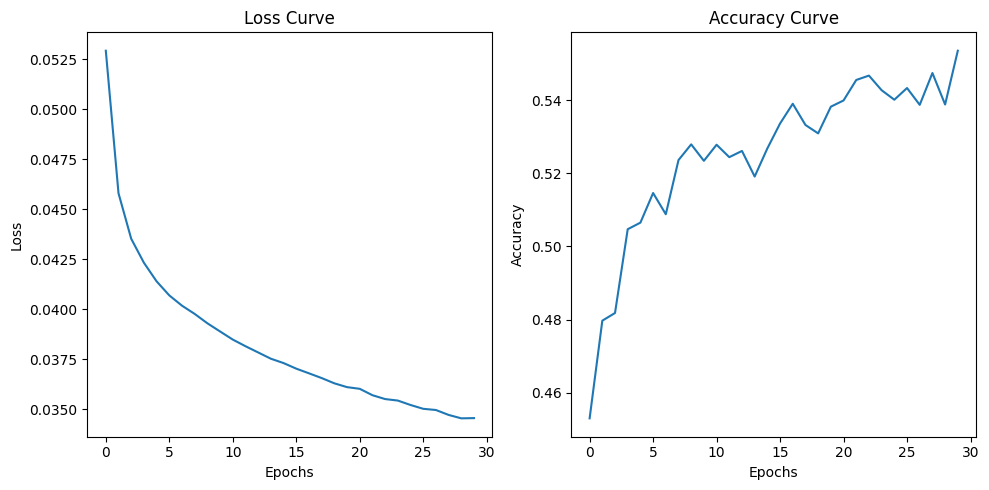

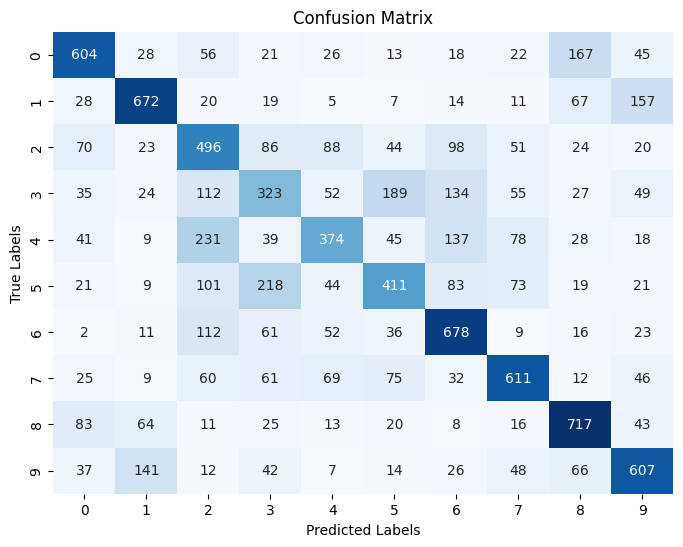

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      1000
           1       0.68      0.67      0.68      1000
           2       0.41      0.50      0.45      1000
           3       0.36      0.32      0.34      1000
           4       0.51      0.37      0.43      1000
           5       0.48      0.41      0.44      1000
           6       0.55      0.68      0.61      1000
           7       0.63      0.61      0.62      1000
           8       0.63      0.72      0.67      1000
           9       0.59      0.61      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000

------- Important Metrics ------
Accuracy: 0.5493
F1: 0.55
Test time: 1.979222059249878
Training time: 140.33120608329773
Params count: 101386
-------- Hyperparameter -------
Hidden Layer Neurons: [128, 256, 256, 10]
Hidden Layer Nums: 3
Act

In [ ]:
layerSize = [128,256,256,10]
layerActivations = [None, 'leaky_relu', "leaky_relu",'softmax']
learningRate_fit = 0.0001
epochs_fit = 30
lr_decay_fit = 0.99
momentum_fit = 0.95
batch_size_fit = 32
dropout_rate = 0
batch_norm = False
weight_decay=0.1
nn = MLP(layerSize, layerActivations,dropout=dropout_rate,batchnorm=batch_norm,weight_decay=weight_decay)
nn.summary()
loss,acc = nn.fit(train.X_train, train.y_train, train.X_val, train.y_val, learning_rate = learningRate_fit, batch_size = batch_size_fit, epochs = epochs_fit, lr_decay=lr_decay_fit, momentum=momentum_fit)
_=nn.calculate_accuracy(test.X_test, test.Y_test,is_test=True)